# State Value Function

We want to calculate $V_{\pi}(s)$ (the state-value-function given a policy)
![mdp.png](mdp.png)

# 6.1 Policy Evaluation by Dynamic Programming

In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import numpy as np

policy=np.array([[0.3, 0.2, 0.5], [0.5, 0.4, 0.1], [0.8, 0.1, 0.1]])
# 'raw_rewards' variable contains rewards obtained after transition to each state
# In our example it doesn't depend on source state
raw_rewards = np.array([1.5, -1.833333333, 19.833333333])
# 'rewards' variable contains expected values of the next reward for each state
rewards = np.matmul(policy, raw_rewards)
assert np.allclose(rewards, np.array([10., 2., 3.]))

state_value_function=np.array([0 for i in range(3)])

gamma = 0.1

for i in range(20):
    print(state_value_function)
#     state_value_function = rewards + gamma * np.matmul(policy, state_value_function)
    state_value_function = np.einsum("si,i->s", policy, raw_rewards + gamma * state_value_function)
print(state_value_function)

[0 0 0]
[10.  2.  3.]
[10.49  2.61  3.85]
[10.5594  2.6674  3.9038]
[10.56532   2.673704  3.910464]
[10.56595688  2.6743188   3.91106728]
[10.56601845  2.67438127  3.91113041]
[10.5660247   2.67438748  3.91113659]
[10.56602532  2.6743881   3.91113722]
[10.56602538  2.67438816  3.91113728]
[10.56602539  2.67438817  3.91113728]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]
[10.56602539  2.67438817  3.91113729]


# 6.1 Policy Evaluation by Linear Programming

The state-value-function can be directly solved through linear programming (as shown on page 15):


In [11]:
solution= np.linalg.inv(np.eye(3) - gamma * policy) @ rewards #TODO: Implement the linear programming solution with a discount rate of 0.1
print(solution)

[10.56602539  2.67438817  3.91113729]


The result stays the same.

# 6.2 Monte Carlo Policy Evaluation


Monte Carlo Policy Evaluation can also be used, whereby sampling is used to get to the same result

In [14]:
import random
from collections import defaultdict
reward_counter=np.array([0., 0., 0.])
visit_counter=np.array([0., 0., 0.])

def gt(rewardlist, gamma=0.1):
    '''
    Function to calculate the total discounted reward
    >>> gt([10, 2, 3], gamma=0.1)
    10.23
    '''
    result = 0
    gamma_k = 1
    for reward in rewardlist:
        result += gamma_k * reward
        gamma_k *=gamma
    return result


for i in range(400):
    start_state=random.randint(0, 2)
    next_state=start_state
    rewardlist=[]
    occurence=defaultdict(list) 
    for i in range(250):
        rewardlist.append(rewards[next_state]) 
        occurence[next_state].append(len(rewardlist)-1) 
        action=np.random.choice(np.arange(0, 3), p=policy[next_state]) 
        next_state=action

    for state in occurence: 
        for value in occurence[state]: 
            rew=gt(rewardlist[value:]) 
            reward_counter[state]+=rew 
            visit_counter[state]+=1 
            #break #if break: return following only the first visit

print(reward_counter/visit_counter)

[10.56504985  2.67198655  3.9100127 ]


As can be seen the result is nearly the same as the state-value-function calculated above.

# 6.2 Policy Optimization by Q-Learning

This code solves a very easy problem: using the rewards it calculated the optimal action-value-function.

It samples a state-action pair randomly, so that all state-action pairs can be seen.

In [15]:
q_table=np.zeros((3, 3)) 
alpha = 0.1

for i in range(1001): 
    state=random.randint(0, 2) 
    action=random.randint(0, 2) 
    next_state=action
    reward=rewards[next_state] 
    next_q=max(q_table[next_state]) 
    q_table[state, action] += alpha * (reward + gamma * next_q - q_table[state, action]) #TODO: Implement the Q-Table update
    if i%100==0:
        print(q_table)

[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[8.41102027 1.57468982 2.39395193]
 [6.51547241 1.68066129 2.36999445]
 [9.06187459 1.46486146 2.27326971]]
[[ 9.71580942  2.5559344   3.39317586]
 [ 9.21520129  2.59851573  3.59164552]
 [10.32709434  2.27610926  3.46441902]]
[[10.66116052  2.88508282  3.89290878]
 [10.1619736   2.86636364  3.93773665]
 [10.68156648  2.75546805  3.83025946]]
[[10.80255767  3.00528269  4.01255941]
 [10.90575777  3.01466728  4.0439407 ]
 [10.99198638  2.96491596  4.01116844]]
[[10.9790719   3.07062795  4.08085099]
 [11.01957298  3.06116213  4.08543799]
 [11.05866168  3.04564465  4.0906629 ]]
[[11.0758511   3.09776594  4.09778307]
 [11.06841243  3.09264786  4.09917104]
 [11.08870401  3.08473416  4.10330271]]
[[11.08910773  3.1048888   4.10590064]
 [11.10017271  3.10196539  4.10792818]
 [11.10030192  3.10201626  4.10826073]]
[[11.1033138   3.10889434  4.1085852 ]
 [11.10622446  3.106751    4.1100583 ]
 [11.10770778  3.10870083  4.10970299]]
[[11.10807471  3.11031307  4

# 6.3 Score Function Gradient Estimator
Implement the score function gradient estimator in lxmls/reinforcement_learning/score\_function\_estimator.py. Check it is correct by calling the train() function.

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
[1.0, 0.3, 1.0, 1.0, 1.0, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 1.0, 0.3, 0.2, 0.2, 0.3, 0.3, 0.2, 0.3, 0.3, 0.2, 0.2, 0.2, 1.0, 1.0, 0.2, 0.2, 1.0, 1.0, 1.0, 0.3, 0.3, 0.2, 0.3, 1.0, 0.2, 0.3, 1.0, 0.3, 0.2]


c:\users\thoma\documents\inria\lxmls-toolkit\lxmls\reinforcement_learning\score_function_estimator.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  poli = torch.nn.functional.softmax(model.t_policy).data.numpy()


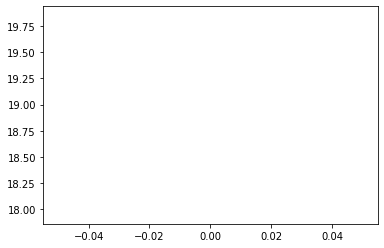

[[0.09968042 0.7759244  0.12439525]
 [0.6318924  0.07035916 0.29774842]
 [0.00520081 0.01600056 0.9787987 ]]
[1.0, 0.3, 0.3, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 1.0, 1.0, 0.2, 1.0, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0]


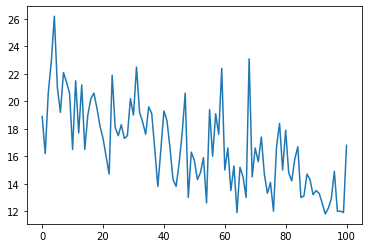

[[0.04479876 0.9229688  0.03223237]
 [0.3731263  0.07851594 0.5483577 ]
 [0.00264321 0.00432239 0.99303436]]
[0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]


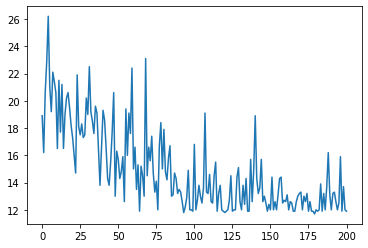

[[0.04009671 0.91337156 0.04653173]
 [0.23435324 0.2108856  0.5547611 ]
 [0.00213963 0.00346933 0.994391  ]]
[0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 1.0, 0.2, 0.2, 1.0, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]


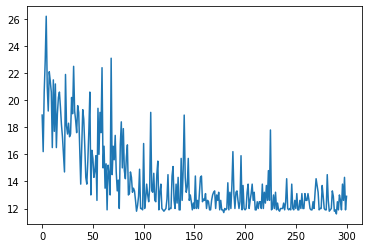

[[0.05111704 0.9017193  0.0471637 ]
 [0.23820686 0.25060698 0.5111862 ]
 [0.00211309 0.00211759 0.9957694 ]]
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]


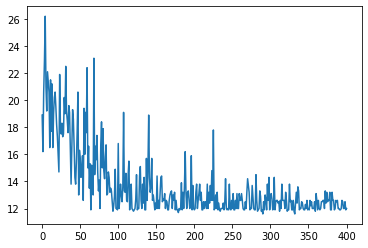

[[0.03353755 0.9269584  0.03950408]
 [0.07986908 0.1721656  0.7479653 ]
 [0.00281821 0.00287064 0.9943111 ]]
[0.2, 1.0, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]


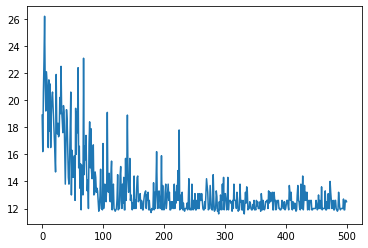

[[0.03557074 0.9170182  0.04741111]
 [0.08151767 0.36910427 0.5493781 ]
 [0.00200166 0.00237459 0.99562377]]
[0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]


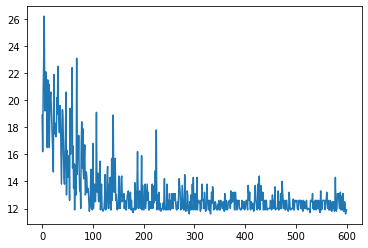

[[0.04385655 0.90224785 0.05389567]
 [0.0789294  0.75214565 0.16892496]
 [0.0014115  0.00136187 0.99722666]]
[1.0, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]


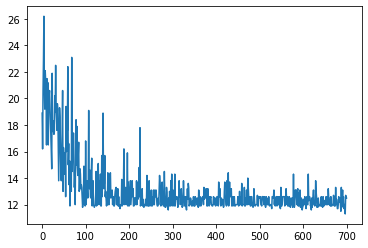

[[0.03049463 0.90577465 0.06373081]
 [0.04501866 0.90212744 0.05285383]
 [0.00124781 0.00117592 0.9975763 ]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, 0.3, 0.3, 0.3]


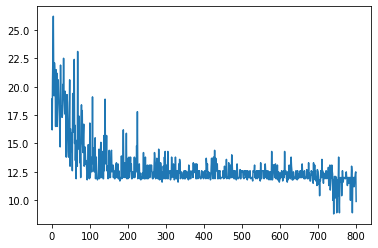

[[0.03586453 0.91337067 0.05076482]
 [0.01773815 0.96388674 0.01837512]
 [0.00118837 0.00124855 0.9975631 ]]
[1.0, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]


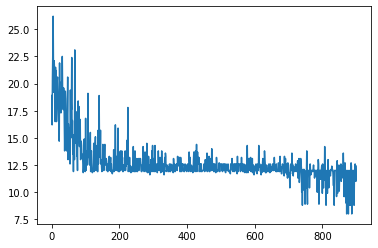

[[0.03298713 0.9227201  0.0442927 ]
 [0.00755229 0.98769414 0.00475347]
 [0.00126167 0.00117904 0.9975593 ]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


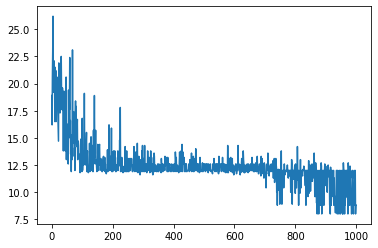

[[0.03858838 0.91582537 0.04558622]
 [0.00626007 0.9899131  0.00382687]
 [0.00145364 0.00139061 0.9971558 ]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]


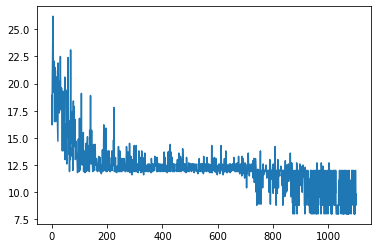

[[0.0301843  0.93839324 0.03142234]
 [0.00804493 0.9879089  0.00404618]
 [0.00112201 0.00135862 0.9975193 ]]
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]


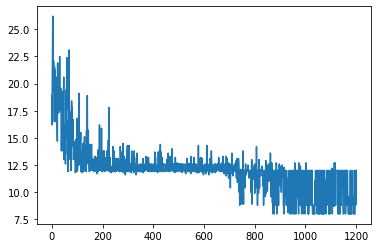

[[0.02718635 0.9455885  0.02722514]
 [0.00851816 0.987931   0.00355084]
 [0.00146389 0.00178886 0.99674726]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


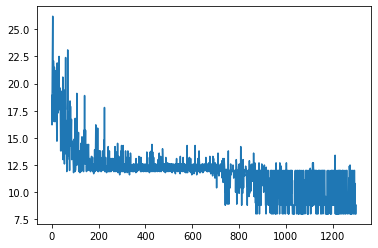

[[0.02040344 0.9615059  0.01809072]
 [0.00486669 0.99145633 0.0036769 ]
 [0.00158482 0.00214848 0.99626666]]
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]


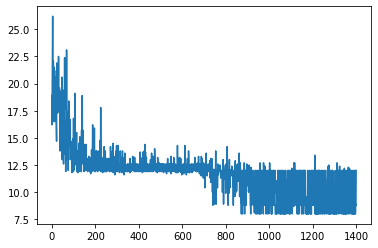

[[0.02400364 0.9548584  0.02113796]
 [0.00211575 0.99591583 0.00196837]
 [0.00219693 0.00279003 0.99501306]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


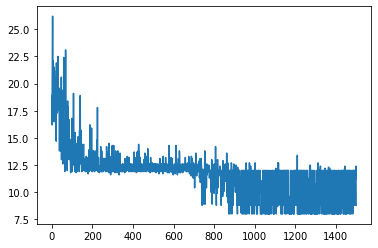

[[0.01887946 0.9602562  0.02086442]
 [0.00163664 0.99651825 0.0018451 ]
 [0.00219128 0.00270838 0.9951003 ]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


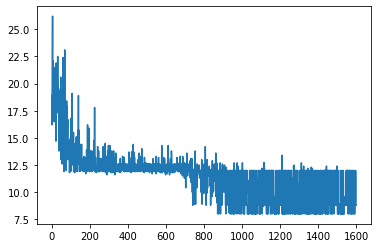

[[0.0151319  0.96696043 0.01790765]
 [0.00110461 0.99772817 0.00116721]
 [0.00216473 0.00247493 0.9953603 ]]
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]


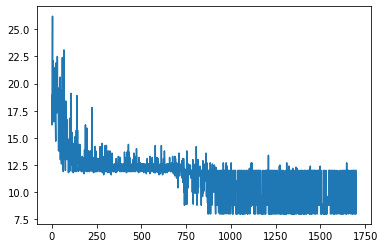

[[0.01077802 0.9739943  0.01522763]
 [0.0013256  0.9972248  0.00144962]
 [0.0023452  0.0033035  0.99435127]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


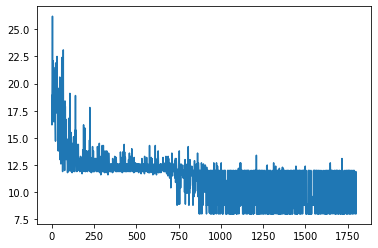

[[0.01054331 0.9758286  0.0136282 ]
 [0.00100504 0.9978448  0.0011501 ]
 [0.00304629 0.00428651 0.99266726]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


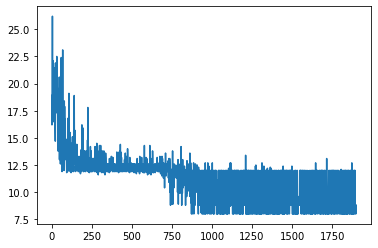

[[1.1607570e-02 9.7325391e-01 1.5138490e-02]
 [8.9511444e-04 9.9811685e-01 9.8799763e-04]
 [3.0221585e-03 4.2752731e-03 9.9270260e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


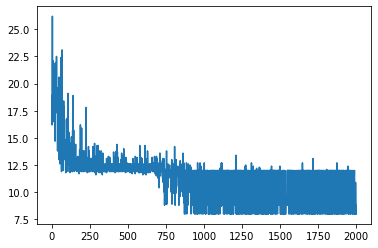

[[0.01104661 0.97328824 0.01566512]
 [0.00108554 0.9976852  0.00122927]
 [0.00333929 0.00538229 0.99127835]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


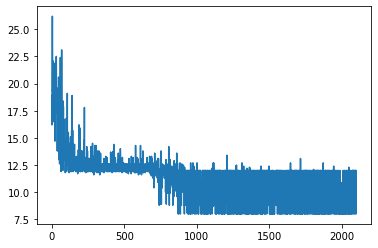

[[9.6618440e-03 9.7682333e-01 1.3514922e-02]
 [1.0989695e-03 9.9794477e-01 9.5625379e-04]
 [3.0778914e-03 6.2886095e-03 9.9063349e-01]]
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]


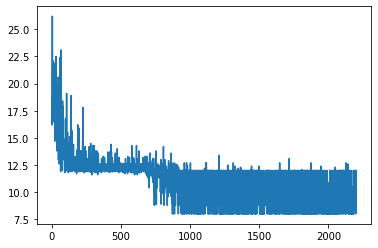

[[7.8873020e-03 9.7920597e-01 1.2906635e-02]
 [1.0836466e-03 9.9811411e-01 8.0230361e-04]
 [3.8888110e-03 7.8588733e-03 9.8825234e-01]]
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


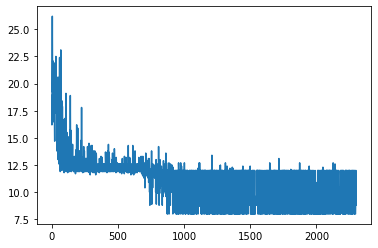

[[8.4281694e-03 9.7761303e-01 1.3958745e-02]
 [1.0670227e-03 9.9819118e-01 7.4186374e-04]
 [3.8019929e-03 9.8742200e-03 9.8632377e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


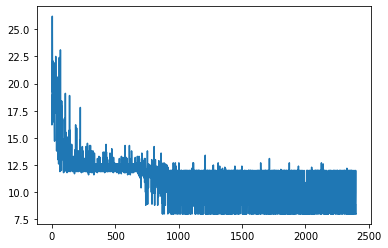

[[8.8950759e-03 9.7664475e-01 1.4460126e-02]
 [9.9949993e-04 9.9819547e-01 8.0504897e-04]
 [4.5958492e-03 1.1467625e-02 9.8393655e-01]]
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]


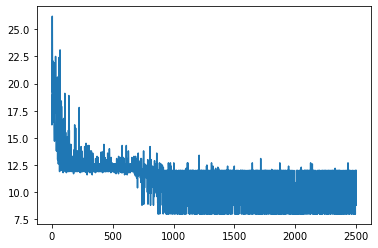

[[7.0332815e-03 9.8254919e-01 1.0417624e-02]
 [1.1457658e-03 9.9792337e-01 9.3083986e-04]
 [7.0777866e-03 1.6359458e-02 9.7656280e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


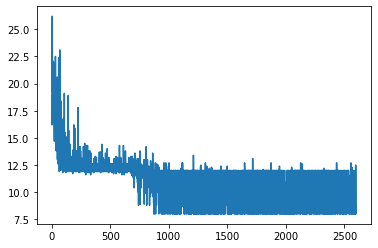

[[7.5730323e-03 9.8109072e-01 1.1336276e-02]
 [8.0456905e-04 9.9852991e-01 6.6554529e-04]
 [7.1185431e-03 3.0237604e-02 9.6264392e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


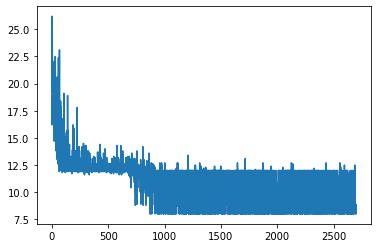

[[7.9960246e-03 9.7993875e-01 1.2065228e-02]
 [5.2265939e-04 9.9898106e-01 4.9629179e-04]
 [9.5445691e-03 4.4562463e-02 9.4589293e-01]]
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


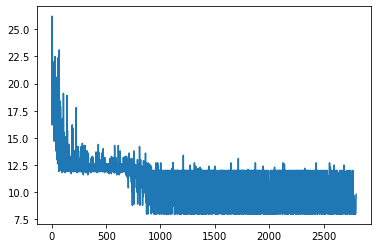

[[7.6208827e-03 9.8008132e-01 1.2297839e-02]
 [4.3989971e-04 9.9914312e-01 4.1700836e-04]
 [9.5124971e-03 5.3458378e-02 9.3702912e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


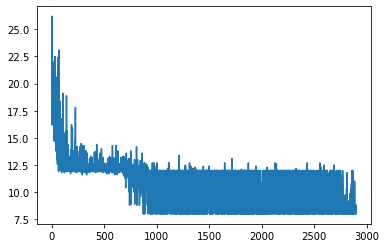

[[8.1636142e-03 9.7850215e-01 1.3334165e-02]
 [5.1947183e-04 9.9898952e-01 4.9095554e-04]
 [1.1235731e-02 5.6458037e-02 9.3230623e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


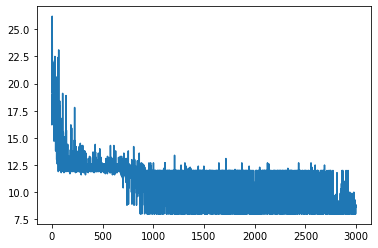

[[8.89930688e-03 9.76335227e-01 1.47655075e-02]
 [4.99967253e-04 9.98973846e-01 5.26226184e-04]
 [1.15420325e-02 6.43077046e-02 9.24150229e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


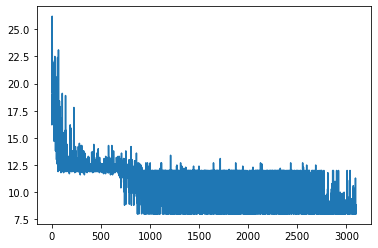

[[9.7372551e-03 9.7383058e-01 1.6432090e-02]
 [4.5853402e-04 9.9911171e-01 4.2972996e-04]
 [1.2094076e-02 1.7258783e-01 8.1531811e-01]]
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


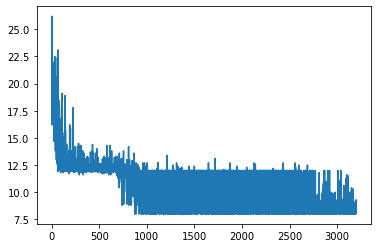

[[9.9579161e-03 9.7413898e-01 1.5903041e-02]
 [4.1615646e-04 9.9923766e-01 3.4611460e-04]
 [1.2386096e-02 1.5283425e-01 8.3477962e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


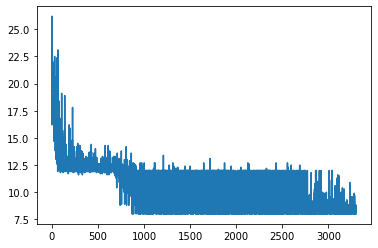

[[1.0919765e-02 9.7135878e-01 1.7721333e-02]
 [3.2013134e-04 9.9937123e-01 3.0868198e-04]
 [1.0182331e-02 8.9923963e-02 8.9989376e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


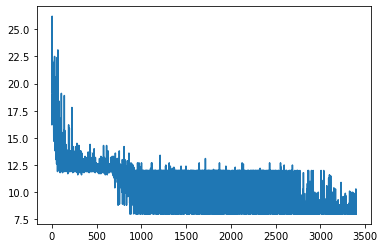

[[8.5724667e-03 9.7620070e-01 1.5226859e-02]
 [3.5175076e-04 9.9931824e-01 3.2996264e-04]
 [1.1899579e-02 1.9307807e-01 7.9502231e-01]]
[0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


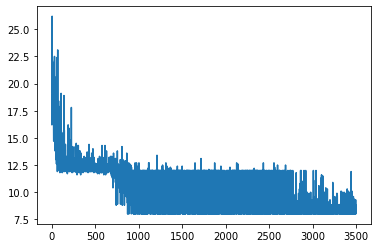

[[8.3863754e-03 9.7777736e-01 1.3836325e-02]
 [3.5646744e-04 9.9929595e-01 3.4758184e-04]
 [1.0882159e-02 1.2953730e-01 8.5958058e-01]]
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


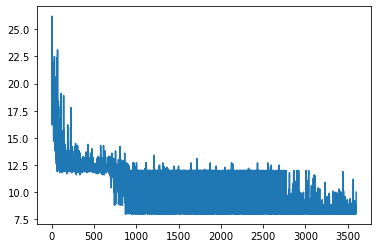

[[7.8794630e-03 9.7790956e-01 1.4210918e-02]
 [3.7331070e-04 9.9926144e-01 3.6518325e-04]
 [1.1579620e-02 9.7056776e-02 8.9136362e-01]]
[0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


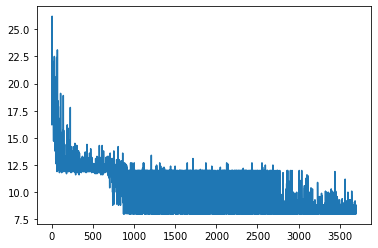

[[8.5145300e-03 9.7586483e-01 1.5620576e-02]
 [3.9481019e-04 9.9920243e-01 4.0272923e-04]
 [1.1587184e-02 9.7519316e-02 8.9089352e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


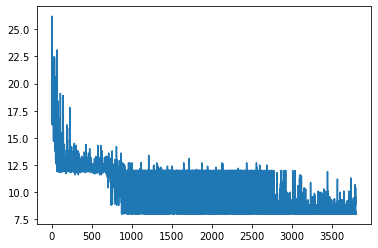

[[8.5065253e-03 9.7674823e-01 1.4745153e-02]
 [3.6313653e-04 9.9926668e-01 3.7027261e-04]
 [1.4816113e-02 1.2405698e-01 8.6112696e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


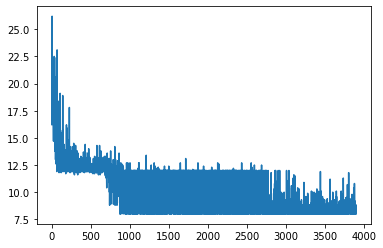

[[9.2913499e-03 9.7430849e-01 1.6400138e-02]
 [3.8344107e-04 9.9923623e-01 3.8034376e-04]
 [1.4040841e-02 1.1775349e-01 8.6820561e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


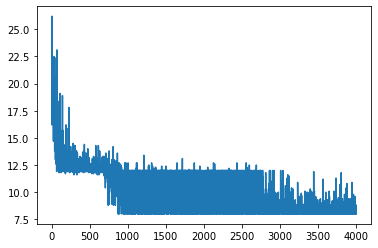

[[8.7241018e-03 9.7776103e-01 1.3514763e-02]
 [3.0972430e-04 9.9938726e-01 3.0292978e-04]
 [2.1349661e-02 1.5283571e-01 8.2581460e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


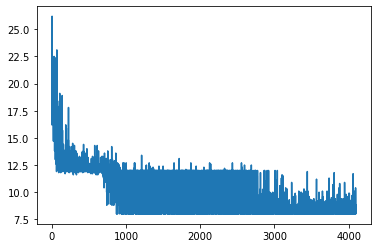

[[9.3599055e-03 9.7597551e-01 1.4664666e-02]
 [3.3410234e-04 9.9935311e-01 3.1279636e-04]
 [1.5428989e-02 1.4062555e-01 8.4394538e-01]]
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


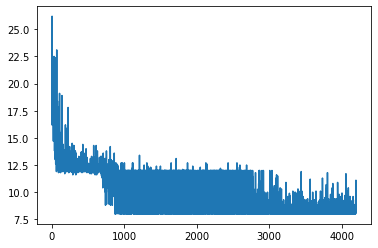

[[8.7716989e-03 9.7625095e-01 1.4977390e-02]
 [3.5858082e-04 9.9932623e-01 3.1520359e-04]
 [1.4343261e-02 8.6232670e-02 8.9942408e-01]]
[0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


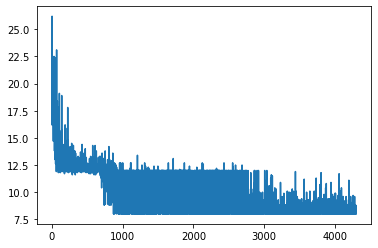

[[8.8021979e-03 9.7709447e-01 1.4103355e-02]
 [3.6561990e-04 9.9932957e-01 3.0487057e-04]
 [1.3330075e-02 5.4193791e-02 9.3247616e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


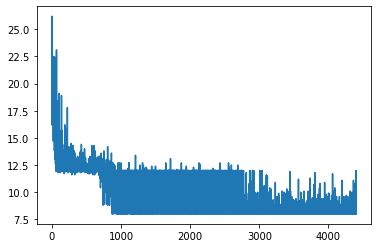

[[9.5556732e-03 9.7491294e-01 1.5531474e-02]
 [3.0880177e-04 9.9940550e-01 2.8571946e-04]
 [1.5697666e-02 8.1164829e-02 9.0313756e-01]]
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


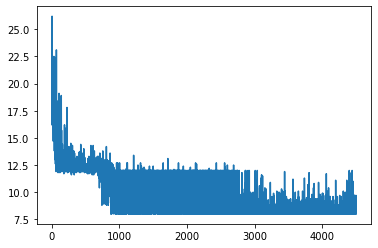

[[1.04079517e-02 9.72412407e-01 1.71796791e-02]
 [3.45622393e-04 9.99335587e-01 3.18851526e-04]
 [1.31289605e-02 1.13708705e-01 8.73162270e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


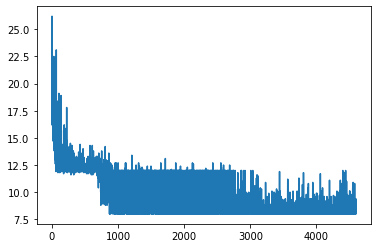

[[1.1114980e-02 9.7031218e-01 1.8572791e-02]
 [3.8696514e-04 9.9926490e-01 3.4814462e-04]
 [1.5125991e-02 1.3071989e-01 8.5415411e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


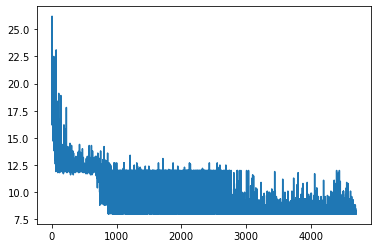

[[9.8936567e-03 9.7338492e-01 1.6721392e-02]
 [4.0970111e-04 9.9925262e-01 3.3770603e-04]
 [8.9351088e-03 6.8202592e-02 9.2286229e-01]]
[0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


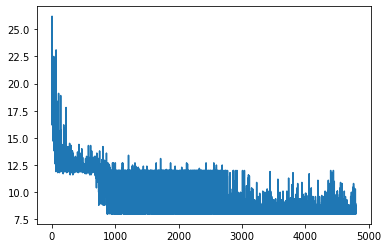

[[8.7849656e-03 9.7647285e-01 1.4742204e-02]
 [3.8547933e-04 9.9930263e-01 3.1189021e-04]
 [8.4270705e-03 7.7275693e-02 9.1429728e-01]]
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


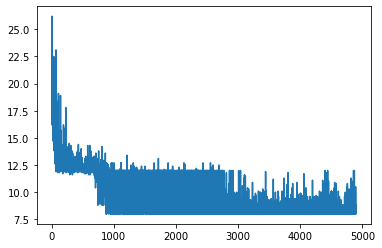

[[8.7980703e-03 9.7728980e-01 1.3912061e-02]
 [3.8179712e-04 9.9930644e-01 3.1171390e-04]
 [1.6521456e-02 2.0090027e-01 7.8257823e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


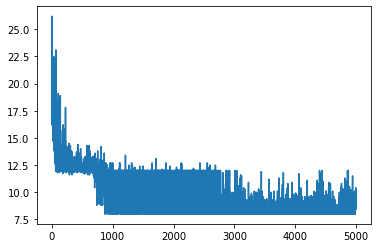

[[9.4501767e-03 9.7542506e-01 1.5124740e-02]
 [3.8422432e-04 9.9934405e-01 2.7172006e-04]
 [1.7417263e-02 2.4419177e-01 7.3839098e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


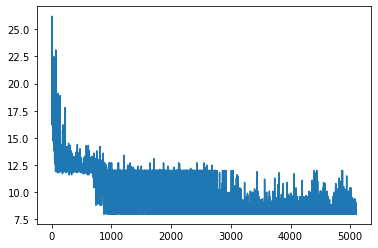

[[1.0159141e-02 9.7337556e-01 1.6465282e-02]
 [3.6592930e-04 9.9939537e-01 2.3877113e-04]
 [1.1237373e-02 8.3578221e-02 9.0518439e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


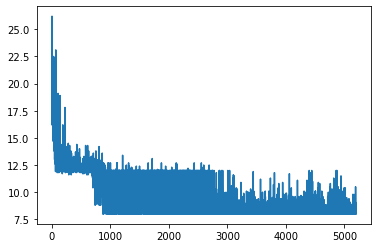

[[8.8378200e-03 9.7670501e-01 1.4457220e-02]
 [3.6398953e-04 9.9938703e-01 2.4899698e-04]
 [1.0699569e-02 1.3724338e-01 8.5205704e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


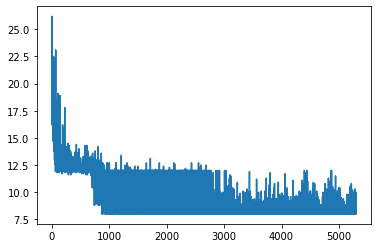

[[7.8610182e-03 9.7900599e-01 1.3133008e-02]
 [4.1496209e-04 9.9930561e-01 2.7943775e-04]
 [9.7466381e-03 1.2116911e-01 8.6908424e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


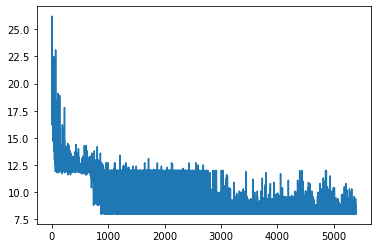

[[7.7536711e-03 9.8008955e-01 1.2156766e-02]
 [4.3979197e-04 9.9929190e-01 2.6825580e-04]
 [1.0684921e-02 1.1081138e-01 8.7850374e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


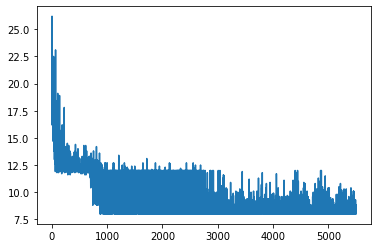

[[7.6383720e-03 9.8118591e-01 1.1175623e-02]
 [4.5222309e-04 9.9930692e-01 2.4088129e-04]
 [9.9586416e-03 1.4679217e-01 8.4324914e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


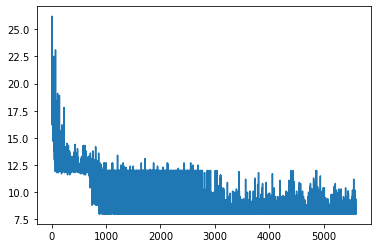

[[6.9931871e-03 9.8190546e-01 1.1101315e-02]
 [4.0712522e-04 9.9935371e-01 2.3916888e-04]
 [9.1961939e-03 1.2389582e-01 8.6690795e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


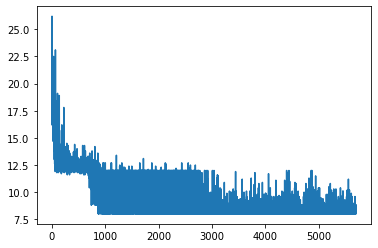

[[7.3815663e-03 9.8079312e-01 1.1825282e-02]
 [4.0131531e-04 9.9935025e-01 2.4833897e-04]
 [1.6594984e-02 2.6561770e-01 7.1778733e-01]]
[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


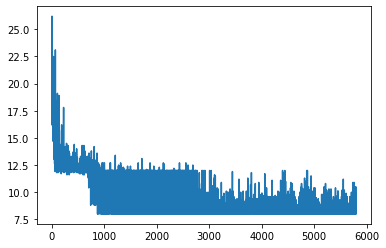

[[6.7455843e-03 9.8151565e-01 1.1738670e-02]
 [4.1561236e-04 9.9931884e-01 2.6554431e-04]
 [1.6140955e-02 3.6636373e-01 6.1749530e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


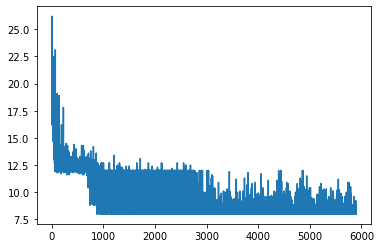

[[7.1986392e-03 9.8010647e-01 1.2694919e-02]
 [3.8023599e-04 9.9936527e-01 2.5446119e-04]
 [1.5984409e-02 3.4660879e-01 6.3740683e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


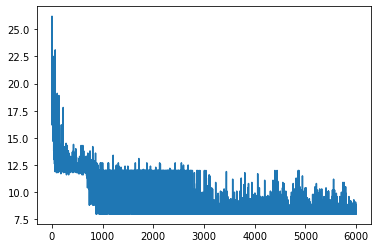

[[6.1486838e-03 9.8284239e-01 1.1009002e-02]
 [3.7664178e-04 9.9936062e-01 2.6264510e-04]
 [1.5424308e-02 5.2236748e-01 4.6220821e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


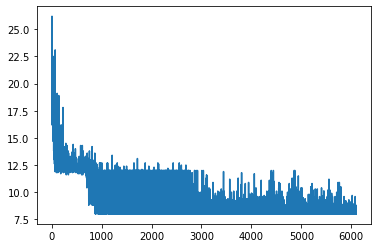

[[6.0687424e-03 9.8367703e-01 1.0254182e-02]
 [3.7673776e-04 9.9939752e-01 2.2573720e-04]
 [1.3457964e-02 7.9450017e-01 1.9204181e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


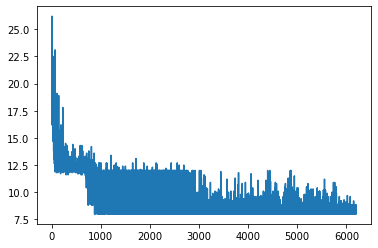

[[5.91712538e-03 9.84660566e-01 9.42226965e-03]
 [3.47015390e-04 9.99426365e-01 2.26622054e-04]
 [1.00944079e-02 8.82831931e-01 1.07073694e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


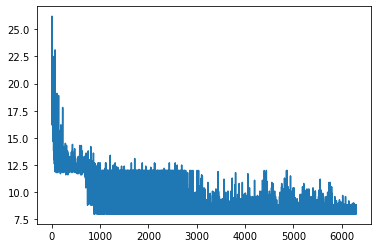

[[5.8066957e-03 9.8547149e-01 8.7218266e-03]
 [3.4905784e-04 9.9943119e-01 2.1973450e-04]
 [1.2489924e-02 8.2532424e-01 1.6218585e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


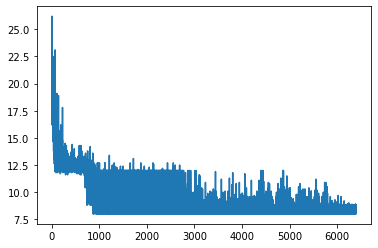

[[6.0853800e-03 9.8471111e-01 9.2036026e-03]
 [3.3572991e-04 9.9947530e-01 1.8894600e-04]
 [1.4614918e-02 7.6588458e-01 2.1950053e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


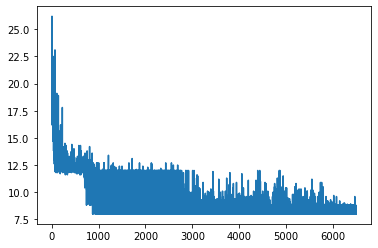

[[5.6014392e-03 9.8698461e-01 7.4140169e-03]
 [3.1574414e-04 9.9949372e-01 1.9056606e-04]
 [1.2343432e-02 6.8804288e-01 2.9961368e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


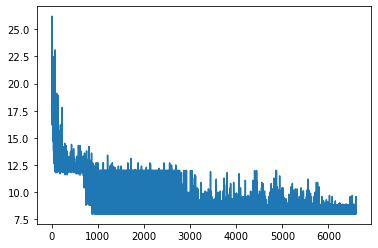

[[5.0321999e-03 9.8777264e-01 7.1951062e-03]
 [3.5438116e-04 9.9943560e-01 2.1009980e-04]
 [1.2272355e-02 6.2128276e-01 3.6644498e-01]]
[0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


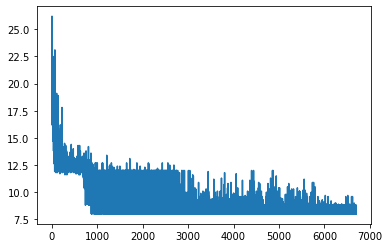

[[5.2383649e-03 9.8723316e-01 7.5284620e-03]
 [3.5922945e-04 9.9942017e-01 2.2067624e-04]
 [9.7722178e-03 7.2674650e-01 2.6348123e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


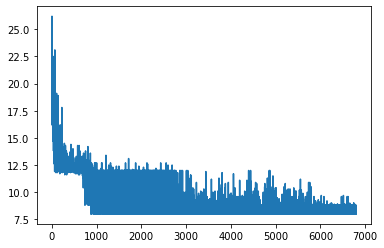

[[5.4284558e-03 9.8673368e-01 7.8378478e-03]
 [3.6094160e-04 9.9942672e-01 2.1225908e-04]
 [8.5396059e-03 6.8429917e-01 3.0716127e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


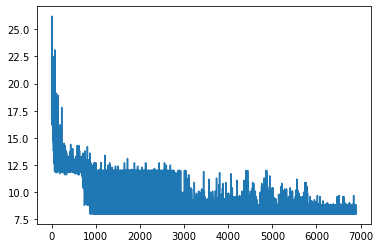

[[4.8572798e-03 9.8754930e-01 7.5934320e-03]
 [3.6248259e-04 9.9942786e-01 2.0969303e-04]
 [8.4996670e-03 7.2452128e-01 2.6697910e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


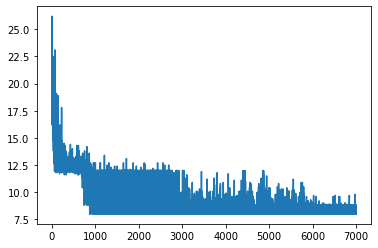

[[5.0706123e-03 9.8694718e-01 7.9821972e-03]
 [4.0610650e-04 9.9936789e-01 2.2604525e-04]
 [7.6696281e-03 7.4310154e-01 2.4922882e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


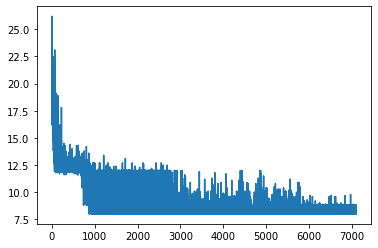

[[4.9681696e-03 9.8765892e-01 7.3729176e-03]
 [3.7011493e-04 9.9940431e-01 2.2554054e-04]
 [7.4623306e-03 7.8622550e-01 2.0631213e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


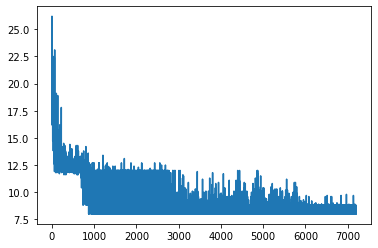

[[5.1233876e-03 9.8724014e-01 7.6364609e-03]
 [3.6926646e-04 9.9941897e-01 2.1188753e-04]
 [6.1589312e-03 8.7458634e-01 1.1925479e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


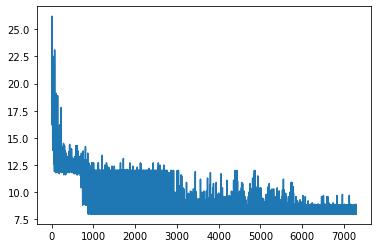

[[5.3242673e-03 9.8669600e-01 7.9798074e-03]
 [3.9254778e-04 9.9940109e-01 2.0639594e-04]
 [6.2373951e-03 8.4376466e-01 1.4999798e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


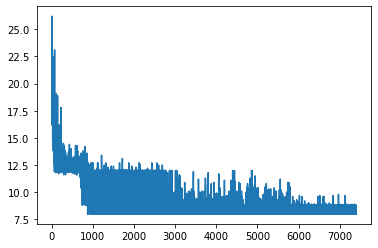

[[4.8083933e-03 9.8739117e-01 7.8003439e-03]
 [3.6621545e-04 9.9942601e-01 2.0774396e-04]
 [6.4570019e-03 8.3934957e-01 1.5419351e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


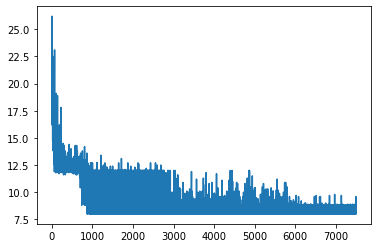

[[4.9716802e-03 9.8691571e-01 8.1125936e-03]
 [3.5298025e-04 9.9945194e-01 1.9499948e-04]
 [6.8723788e-03 8.2382357e-01 1.6930409e-01]]
[0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, 0.2]


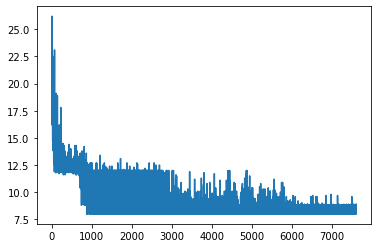

[[4.8265820e-03 9.8775512e-01 7.4183079e-03]
 [2.9515495e-04 9.9955922e-01 1.4563541e-04]
 [8.3814766e-03 6.6175461e-01 3.2986391e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


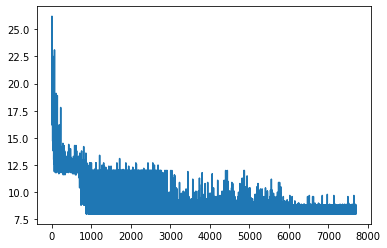

[[4.3614814e-03 9.8837566e-01 7.2629265e-03]
 [2.8243614e-04 9.9957103e-01 1.4652526e-04]
 [7.4498462e-03 7.1240181e-01 2.8014836e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


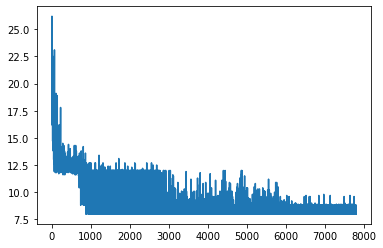

[[4.4987155e-03 9.8796672e-01 7.5345123e-03]
 [2.7320290e-04 9.9957830e-01 1.4848642e-04]
 [7.0797619e-03 7.7565485e-01 2.1726531e-01]]
[0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


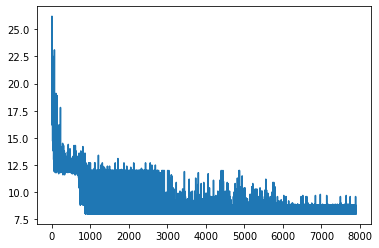

[[4.6564238e-03 9.8749441e-01 7.8491513e-03]
 [2.6437742e-04 9.9961060e-01 1.2504299e-04]
 [7.9543032e-03 7.2311163e-01 2.6893410e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


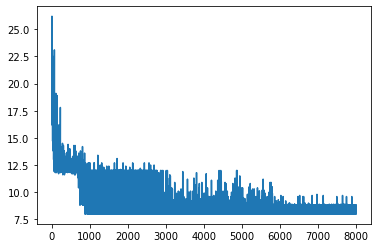

[[4.8350743e-03 9.8695600e-01 8.2088197e-03]
 [2.5879324e-04 9.9961424e-01 1.2686575e-04]
 [7.1250983e-03 7.5554621e-01 2.3732872e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


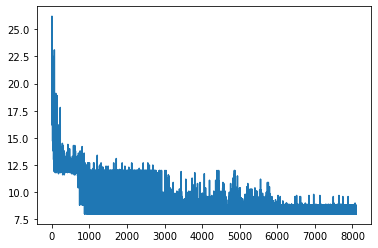

[[4.9316222e-03 9.8654604e-01 8.5222488e-03]
 [2.7172346e-04 9.9959487e-01 1.3343210e-04]
 [5.4294327e-03 8.8324445e-01 1.1132609e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


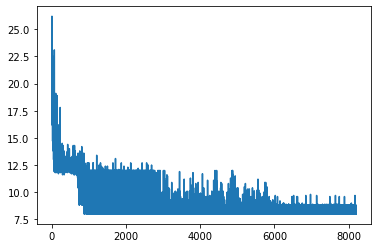

[[5.1399600e-03 9.8590392e-01 8.9560421e-03]
 [2.7443728e-04 9.9958783e-01 1.3780833e-04]
 [5.7982202e-03 8.7118709e-01 1.2301464e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


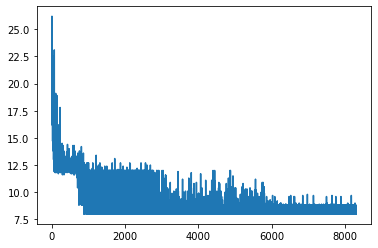

[[5.3246389e-03 9.8533082e-01 9.3445424e-03]
 [2.5293569e-04 9.9961096e-01 1.3602695e-04]
 [6.0314550e-03 8.6538857e-01 1.2857991e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


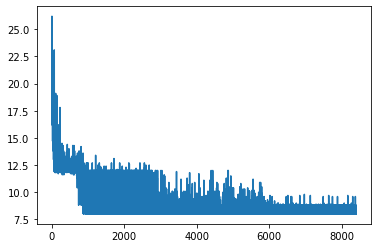

[[5.1847971e-03 9.8624462e-01 8.5706273e-03]
 [2.5096536e-04 9.9960977e-01 1.3924911e-04]
 [6.2919958e-03 8.5839564e-01 1.3531239e-01]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


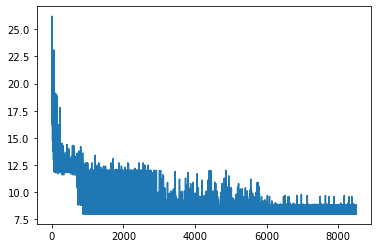

[[5.4432852e-03 9.8547828e-01 9.0784989e-03]
 [2.4645144e-04 9.9962163e-01 1.3189040e-04]
 [5.8670198e-03 8.5587341e-01 1.3825959e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


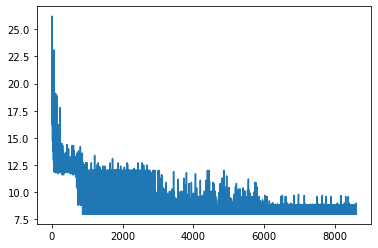

[[5.6672241e-03 9.8480946e-01 9.5233331e-03]
 [2.6881491e-04 9.9958962e-01 1.4156030e-04]
 [5.3638555e-03 8.8778907e-01 1.0684715e-01]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


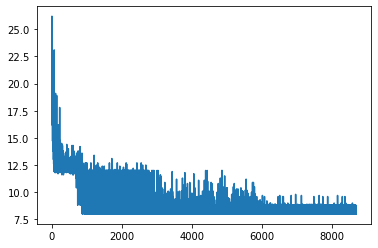

[[5.1643522e-03 9.8540699e-01 9.4287563e-03]
 [2.7021440e-04 9.9958366e-01 1.4605888e-04]
 [4.4259708e-03 9.1038233e-01 8.5191600e-02]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


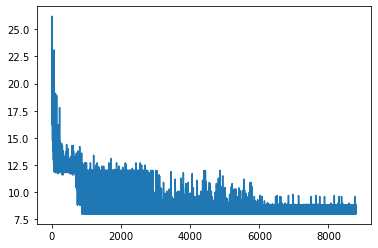

[[5.3901556e-03 9.8467511e-01 9.9346656e-03]
 [2.4721731e-04 9.9960881e-01 1.4397906e-04]
 [4.6875412e-03 9.0142143e-01 9.3891077e-02]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


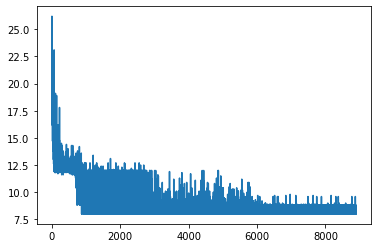

[[5.6727347e-03 9.8375064e-01 1.0576689e-02]
 [2.4056001e-04 9.9961334e-01 1.4610043e-04]
 [4.5374469e-03 9.1113859e-01 8.4323995e-02]]
[0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


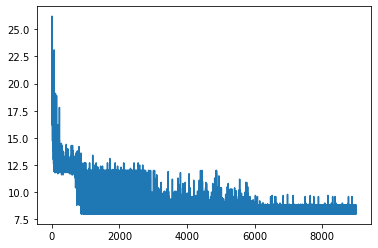

[[5.9455177e-03 9.8284870e-01 1.1205713e-02]
 [2.3388665e-04 9.9961758e-01 1.4846111e-04]
 [4.2320709e-03 9.2558581e-01 7.0182137e-02]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


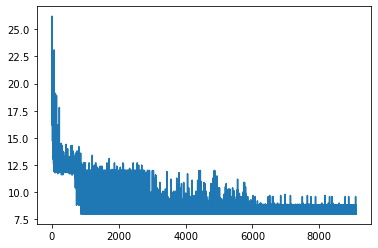

[[5.4619536e-03 9.8331016e-01 1.1227832e-02]
 [2.4724324e-04 9.9959546e-01 1.5733672e-04]
 [4.0421290e-03 9.3470323e-01 6.1254602e-02]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


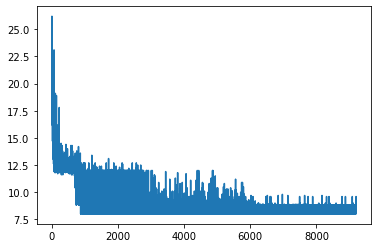

[[5.7467720e-03 9.8227775e-01 1.1975468e-02]
 [2.1399345e-04 9.9964797e-01 1.3799022e-04]
 [3.9361962e-03 9.4053721e-01 5.5526569e-02]]
[0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


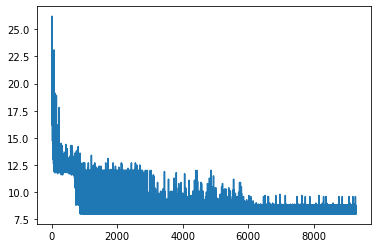

[[5.2502686e-03 9.8506784e-01 9.6818684e-03]
 [2.3147954e-04 9.9962080e-01 1.4768224e-04]
 [3.8422467e-03 9.4508135e-01 5.1076483e-02]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


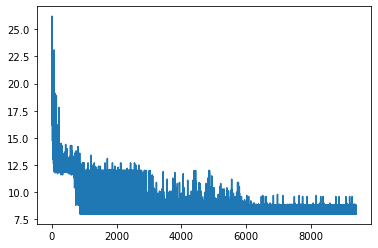

[[5.4594995e-03 9.8438382e-01 1.0156654e-02]
 [2.2020415e-04 9.9963307e-01 1.4674006e-04]
 [3.4941491e-03 9.4513810e-01 5.1367830e-02]]
[1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


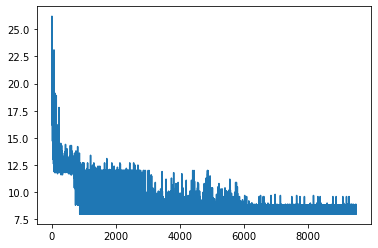

[[5.3296527e-03 9.8530954e-01 9.3608098e-03]
 [2.1478900e-04 9.9963844e-01 1.4686518e-04]
 [3.0807299e-03 9.5845282e-01 3.8466465e-02]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


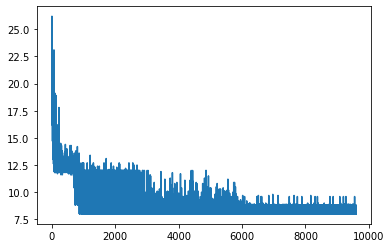

[[5.5347453e-03 9.8466820e-01 9.7970273e-03]
 [2.2620772e-04 9.9962473e-01 1.4907266e-04]
 [3.0328452e-03 9.6063548e-01 3.6331713e-02]]
[0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


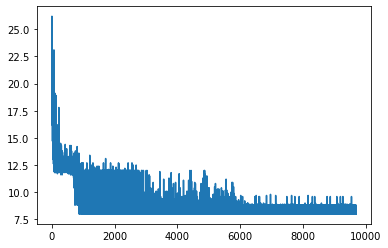

[[5.7729371e-03 9.8391783e-01 1.0309290e-02]
 [2.4592850e-04 9.9959379e-01 1.6032020e-04]
 [3.3501191e-03 9.5294595e-01 4.3704011e-02]]
[0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


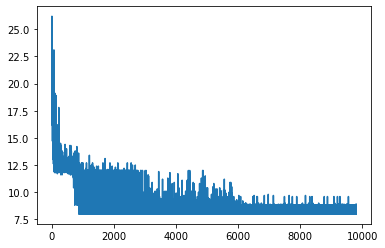

[[5.9712026e-03 9.8328859e-01 1.0740254e-02]
 [2.2223972e-04 9.9963260e-01 1.4517253e-04]
 [3.1004422e-03 9.6065319e-01 3.6246367e-02]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


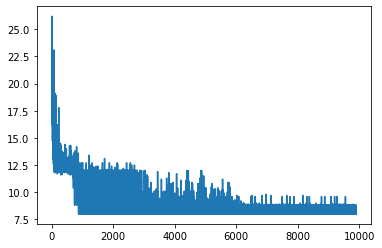

[[6.2786727e-03 9.8230469e-01 1.1416693e-02]
 [1.7563951e-04 9.9969554e-01 1.2888268e-04]
 [3.0345186e-03 9.6315897e-01 3.3806570e-02]]
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


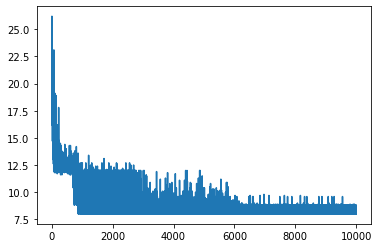

In [25]:
%matplotlib inline
from lxmls.reinforcement_learning.score_function_estimator import train
train()

# 6.4 Policy Gradient for the CartPole task
Implement policy gradient for the cartpole task by coding the forward pass of Model() in lxmls/reinforcement\_learning/policy\_gradient.py. Check it is correct by calling the train() function.

env.action_space Discrete(2)
env.observation_space Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
env.observation_space.high [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
env.observation_space.low [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


c:\users\thoma\anaconda3\envs\lxmls2021\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
c:\users\thoma\documents\inria\lxmls-toolkit\lxmls\reinforcement_learning\policy_gradient.py:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


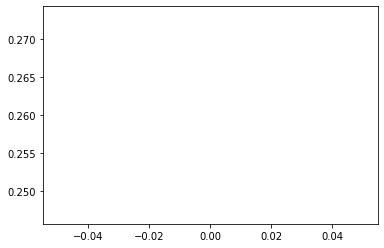

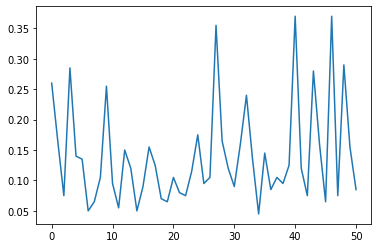

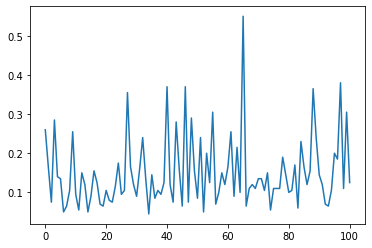

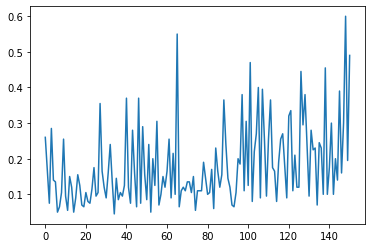

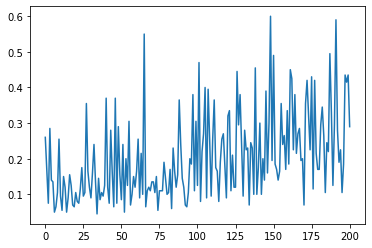

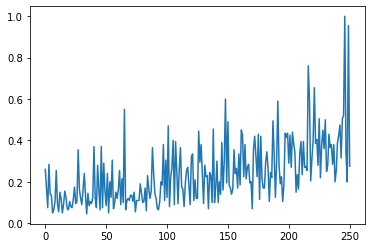

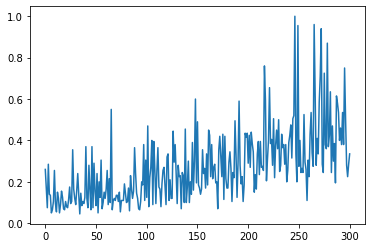

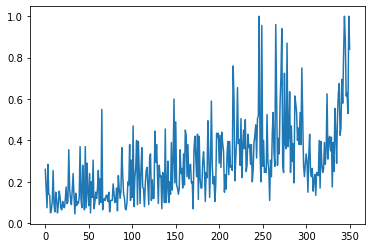

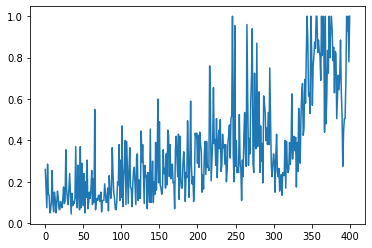

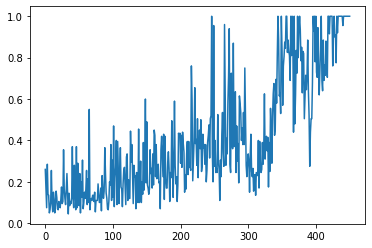

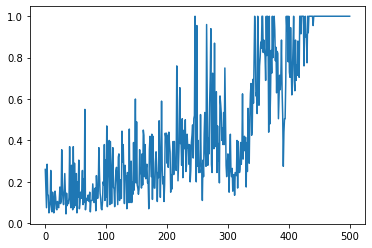

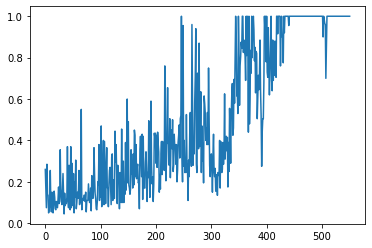

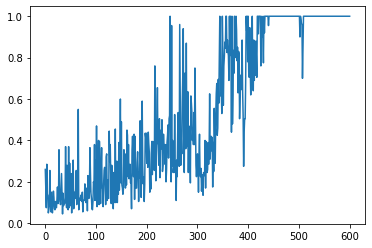

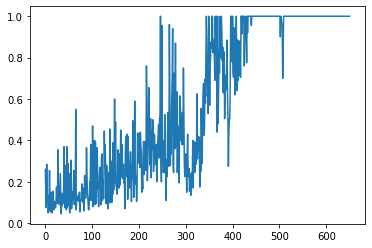

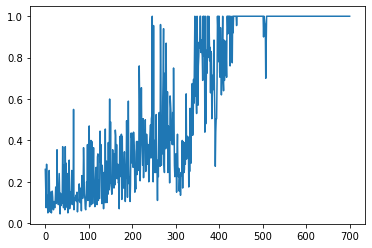

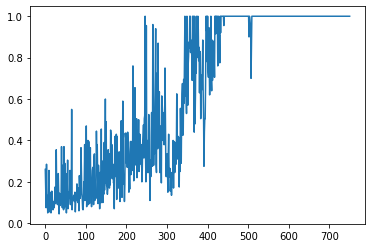

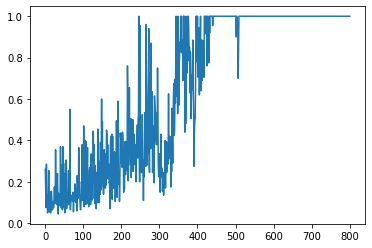

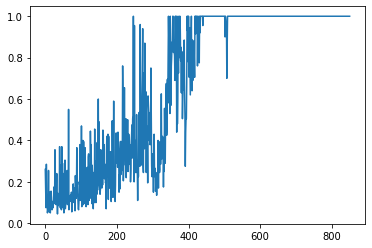

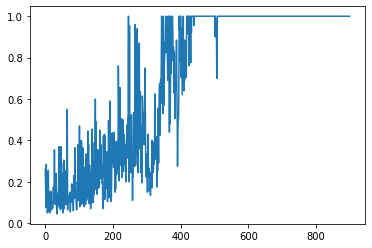

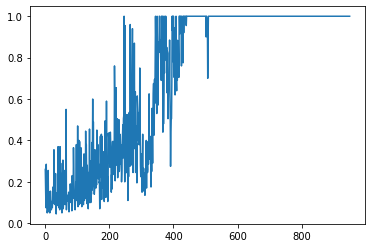

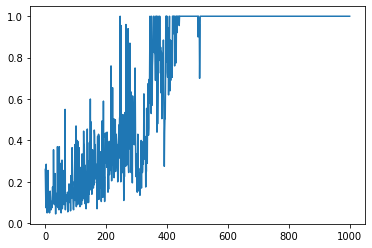

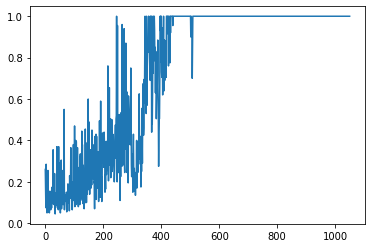

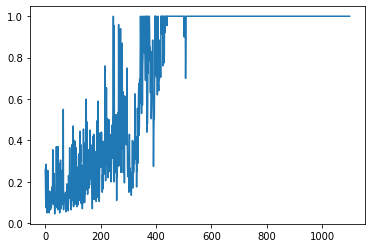

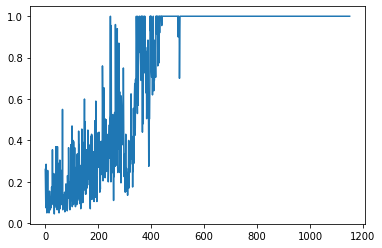

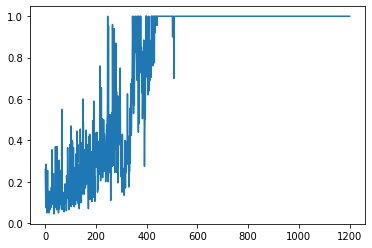

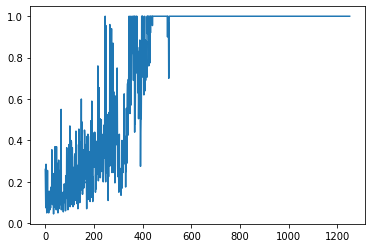

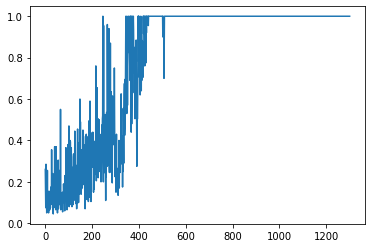

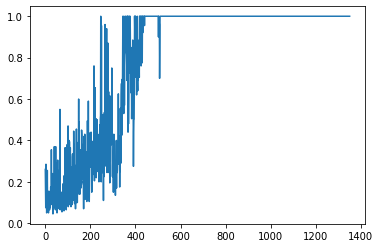

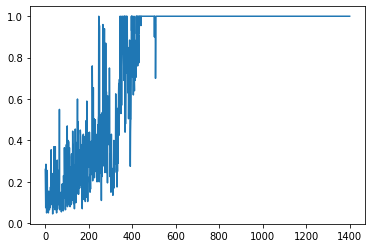

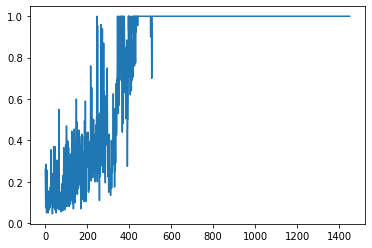

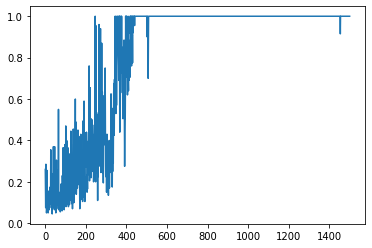

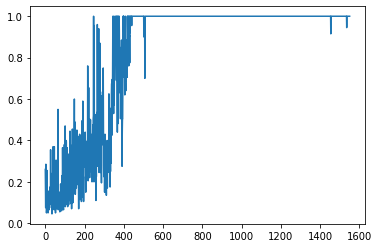

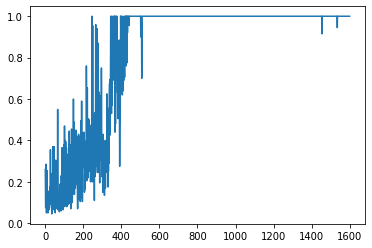

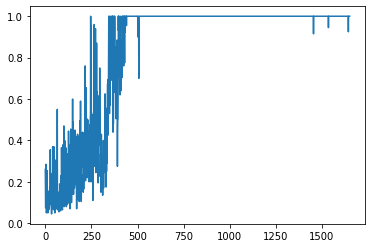

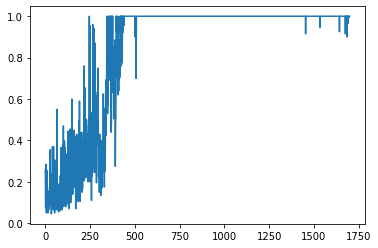

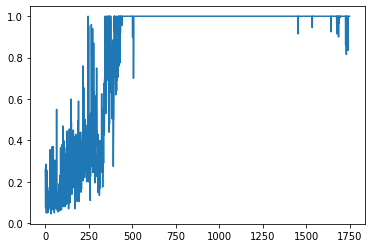

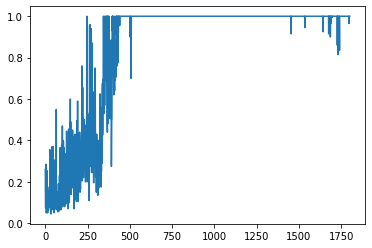

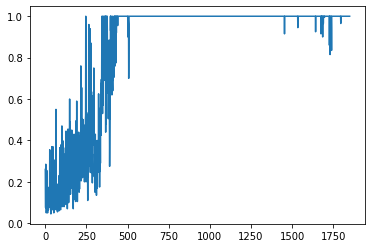

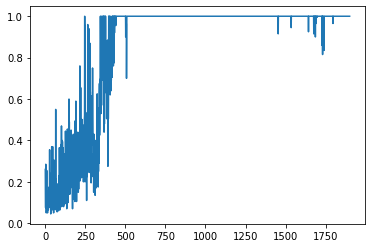

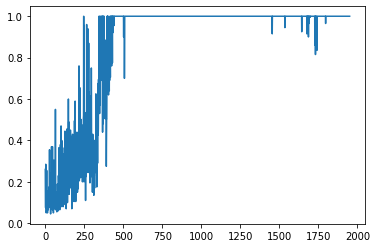

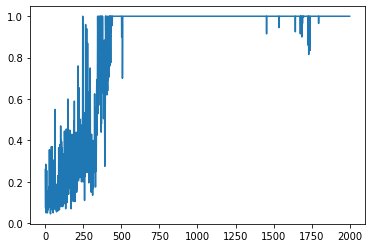

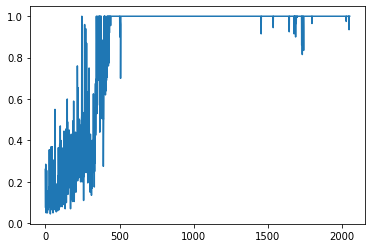

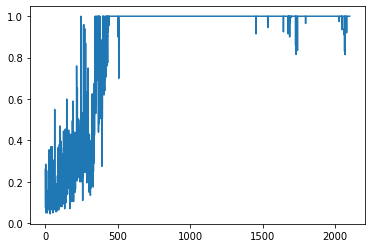

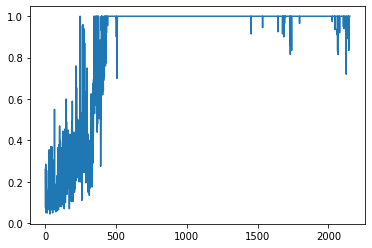

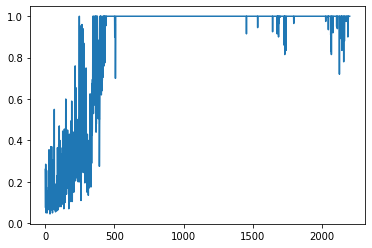

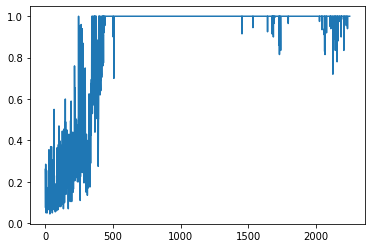

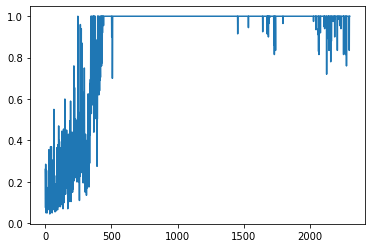

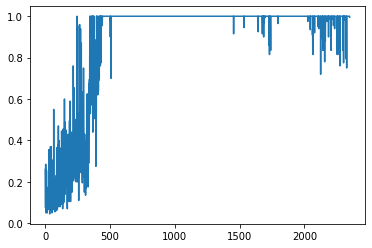

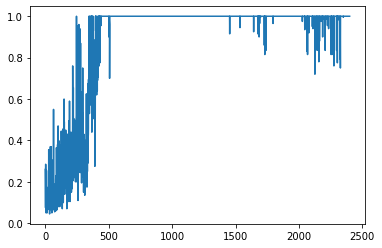

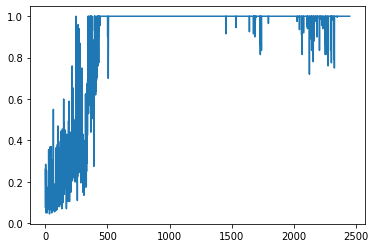

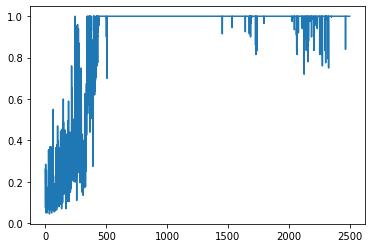

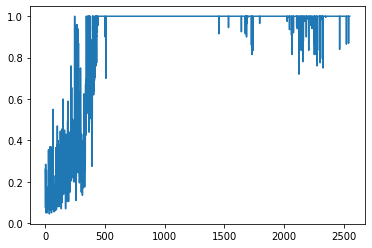

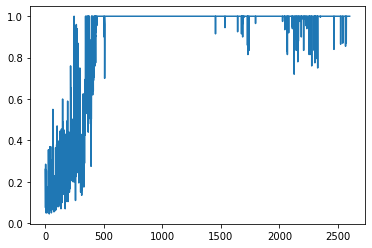

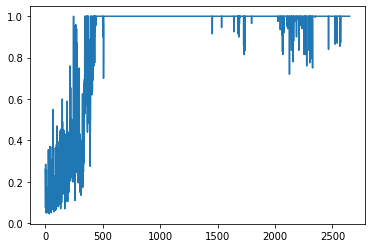

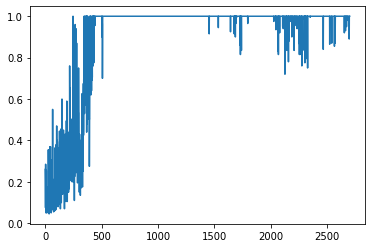

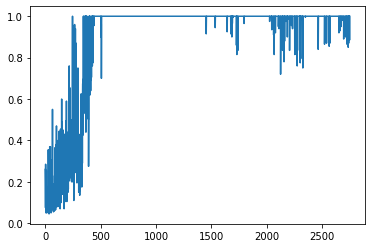

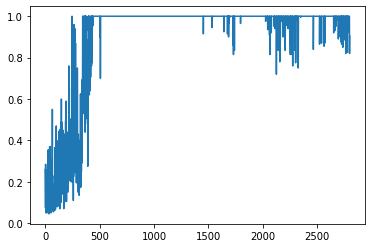

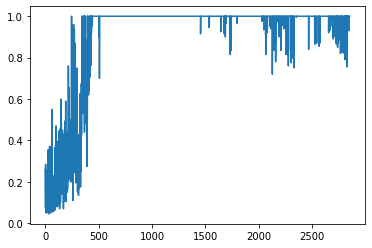

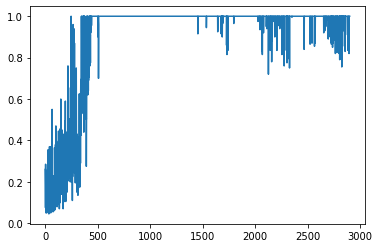

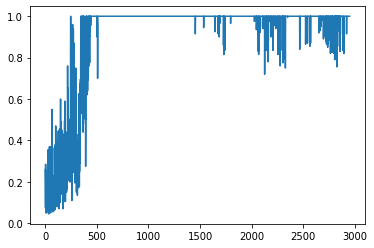

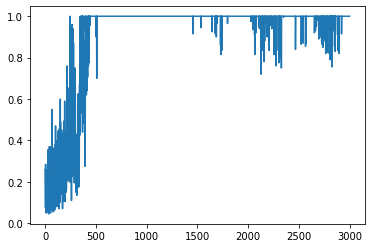

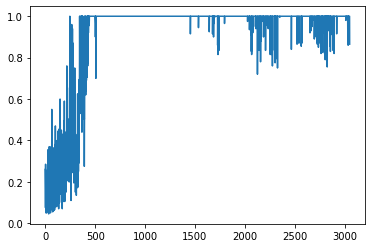

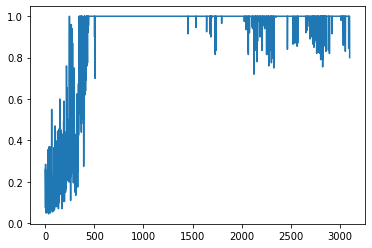

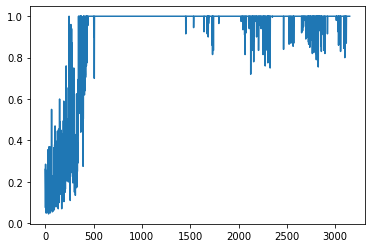

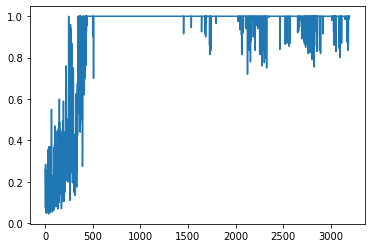

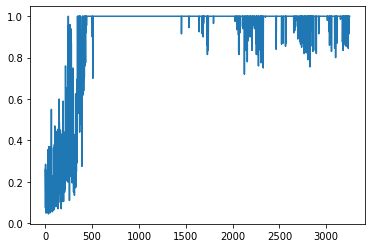

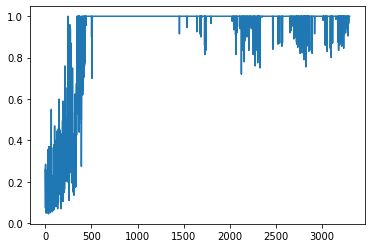

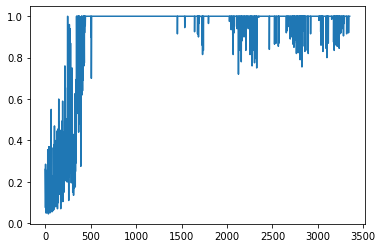

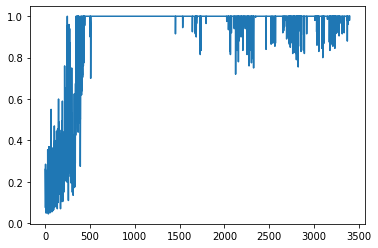

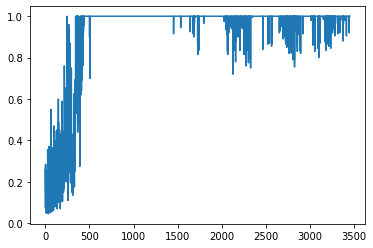

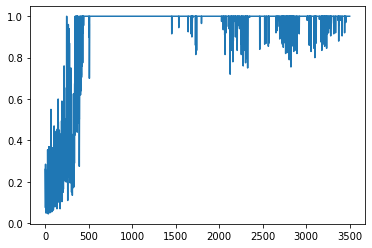

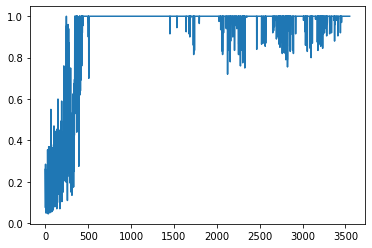

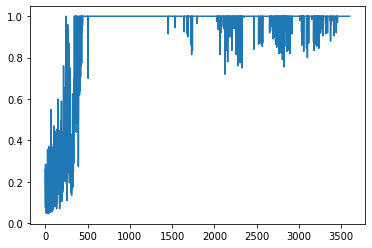

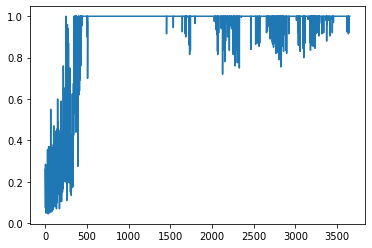

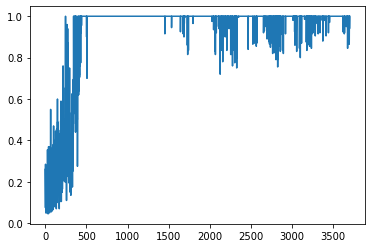

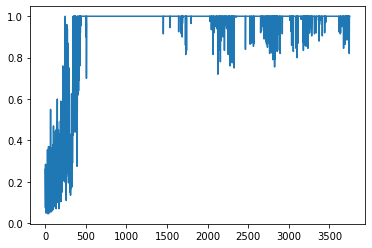

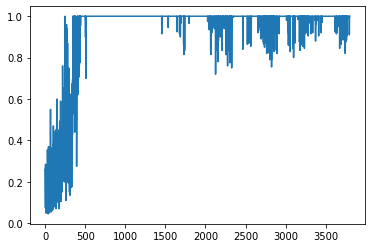

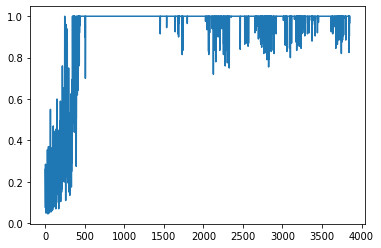

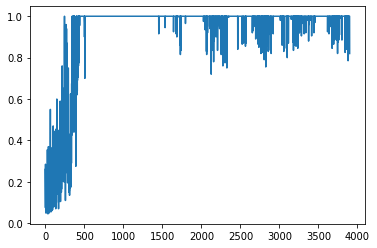

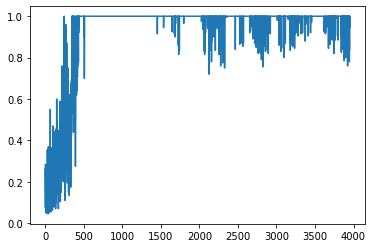

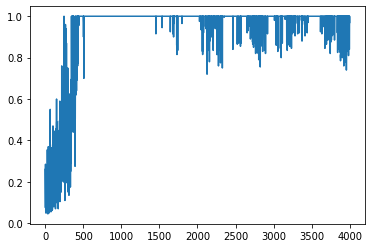

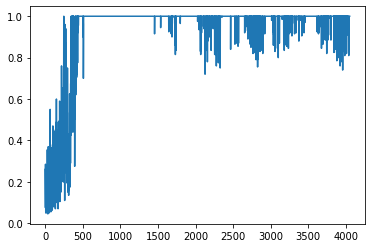

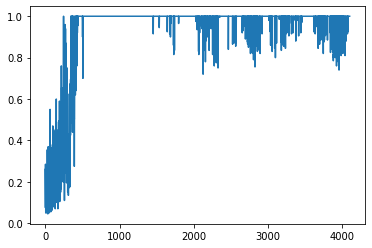

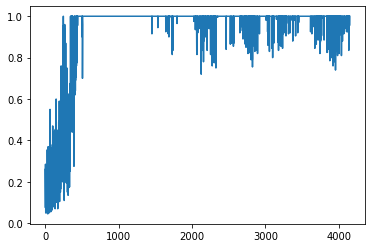

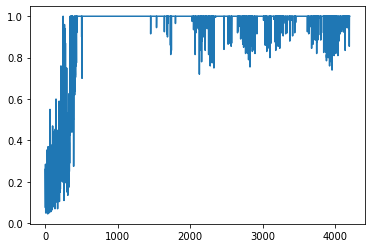

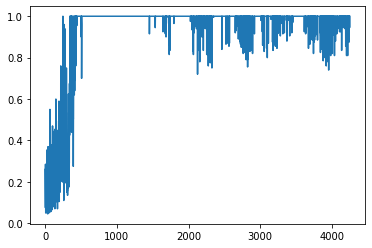

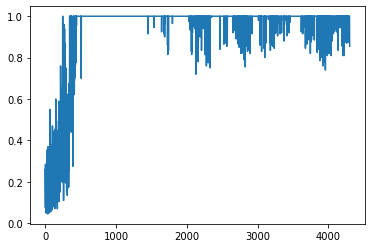

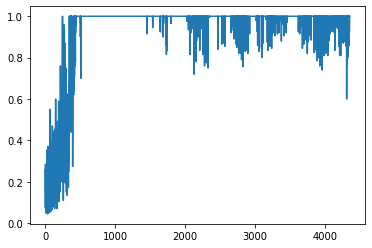

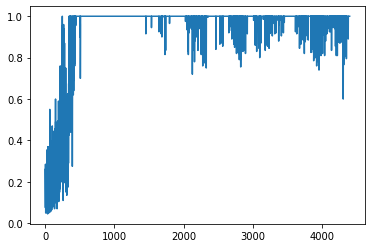

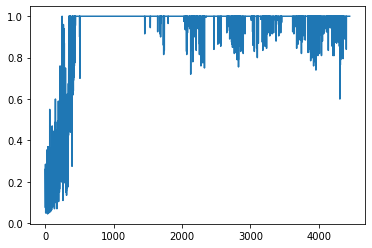

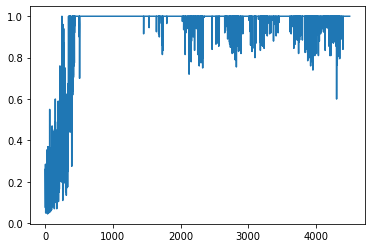

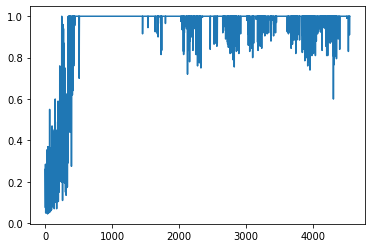

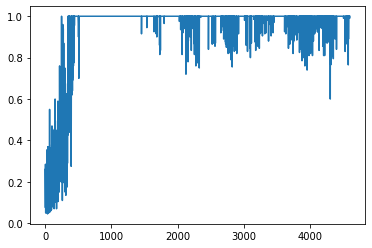

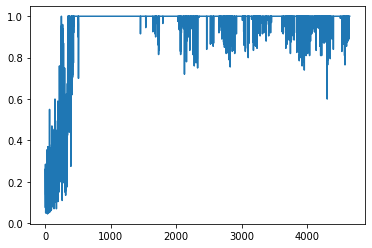

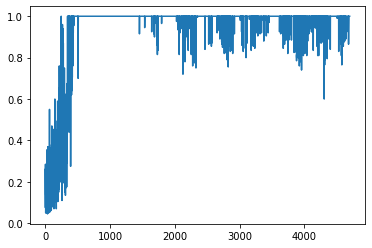

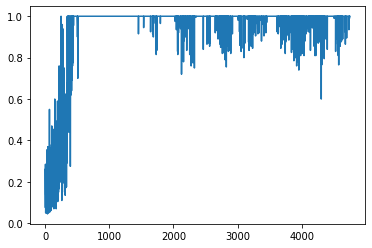

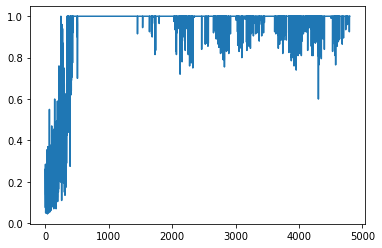

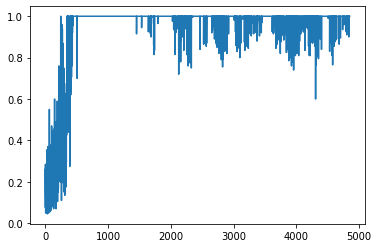

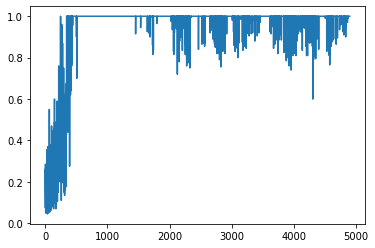

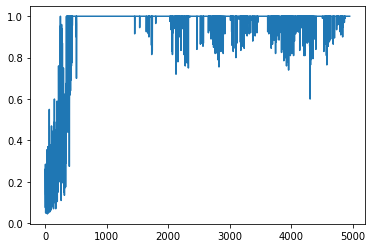

In [34]:
from lxmls.reinforcement_learning.policy_gradient import train
train()

# Extra: Actor Critic for the CartPole task
Implement actor crtitic for the cartpole task by coding the critic forward pass in lxmls/reinforcement\_learning/policy\_gradient.py. Check it is correct by calling the train() function.

c:\users\thoma\documents\inria\lxmls-toolkit\lxmls\reinforcement_learning\actor_critic.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(self.linear2(F.sigmoid(self.linear(input1))))


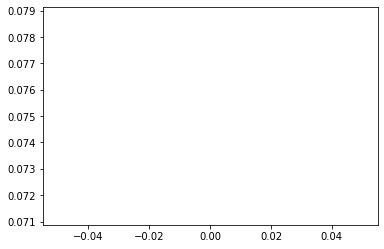

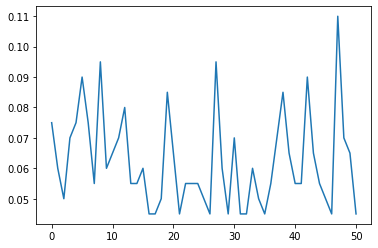

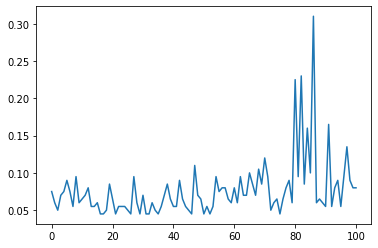

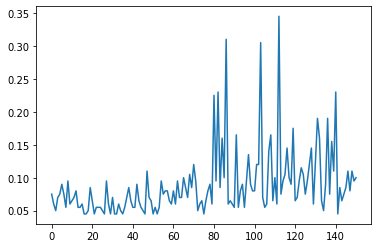

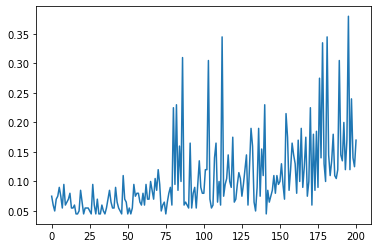

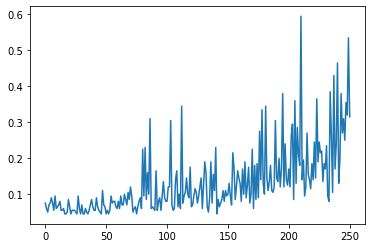

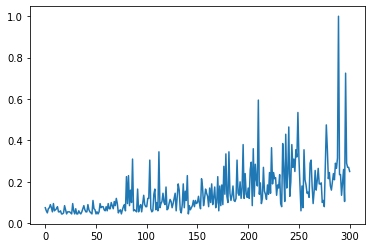

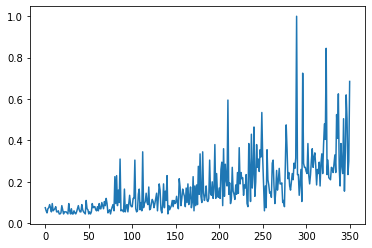

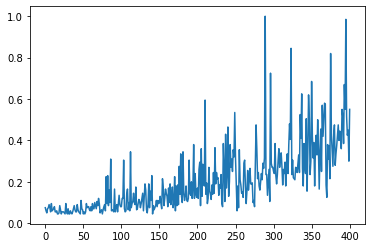

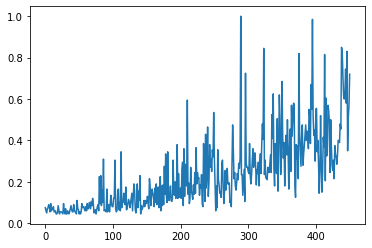

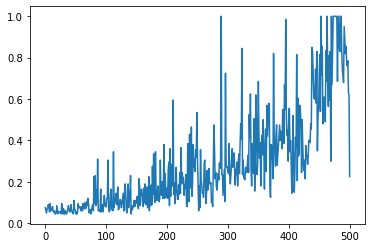

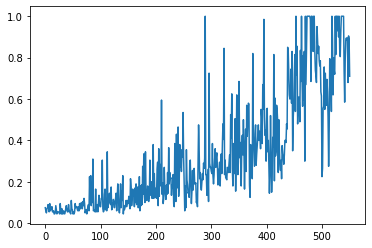

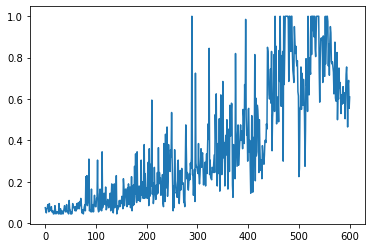

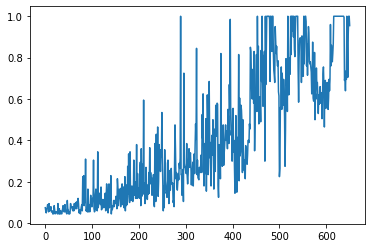

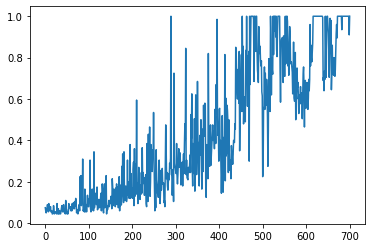

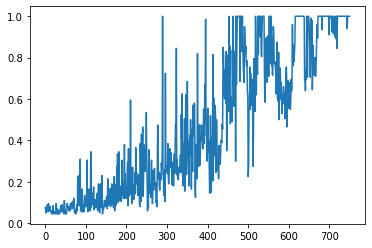

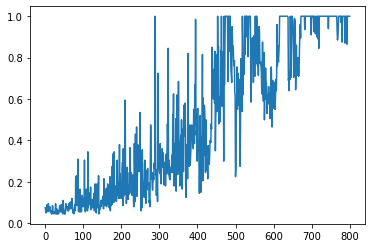

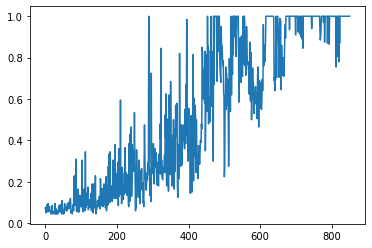

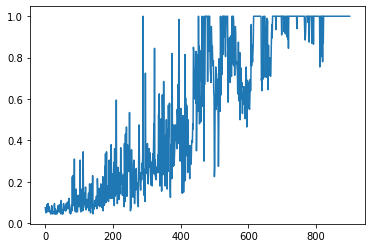

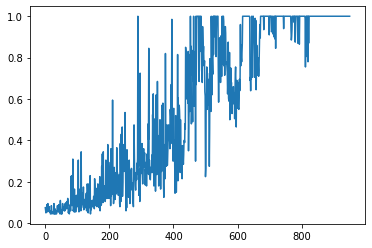

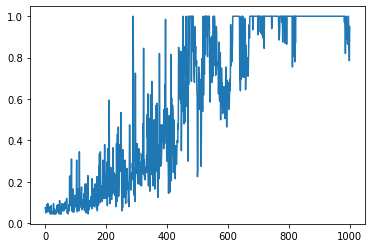

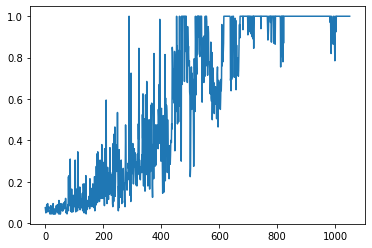

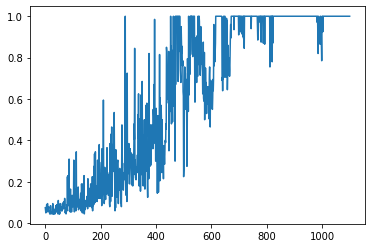

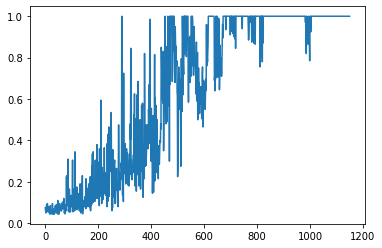

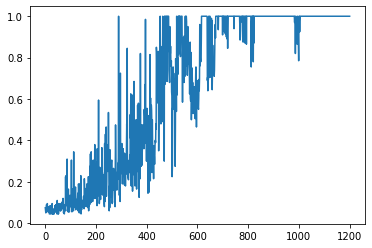

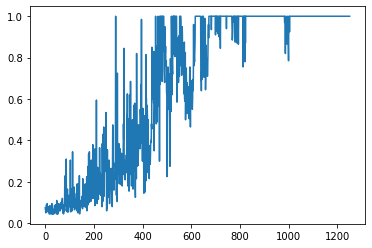

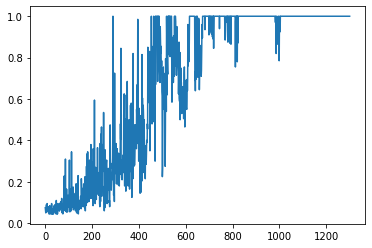

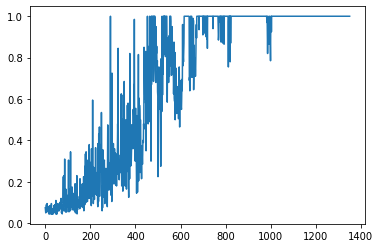

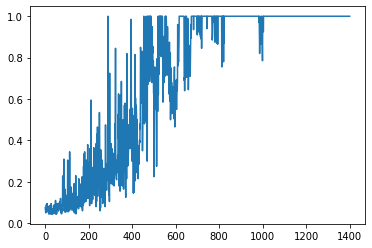

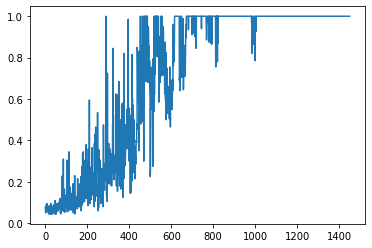

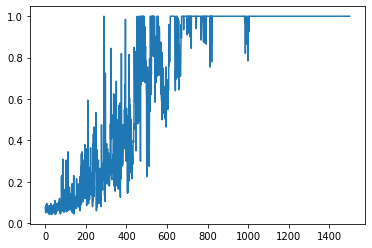

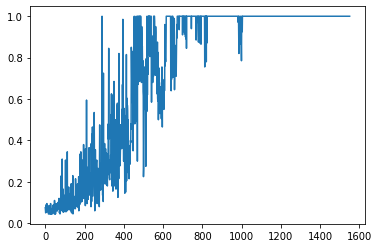

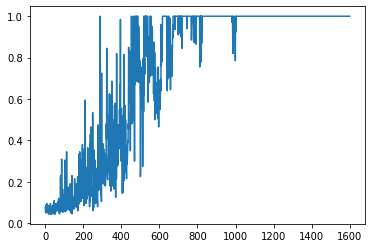

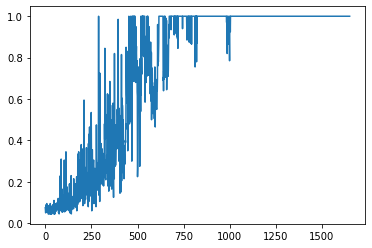

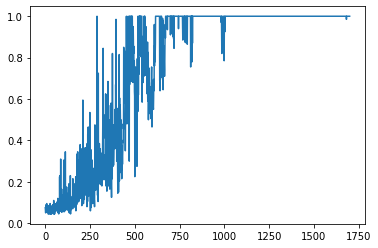

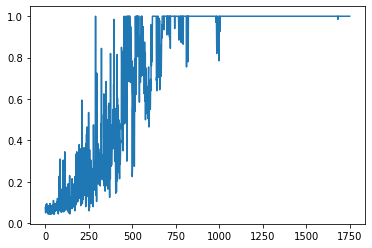

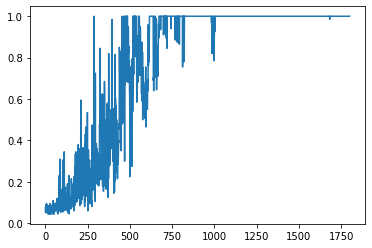

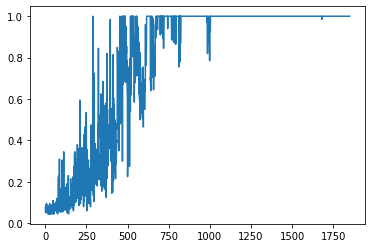

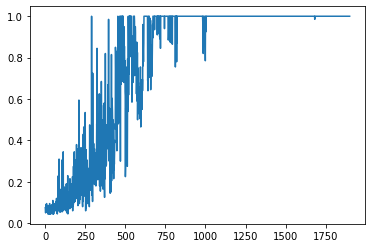

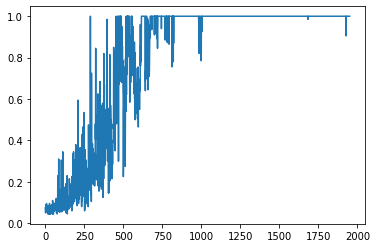

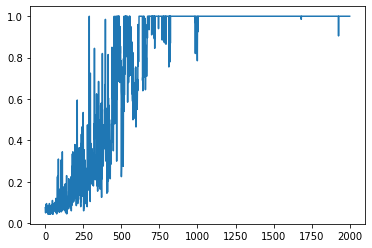

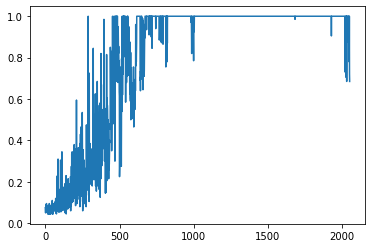

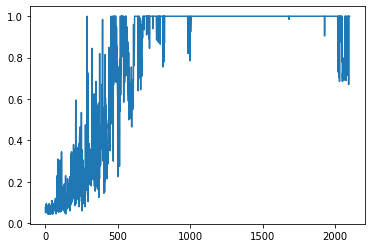

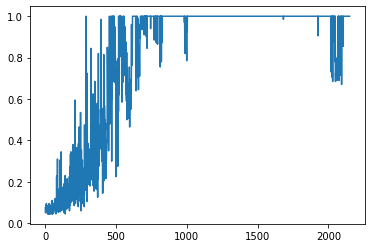

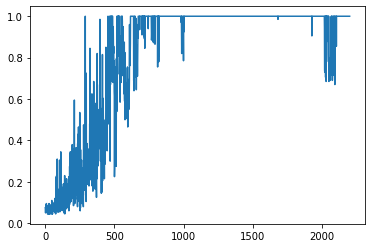

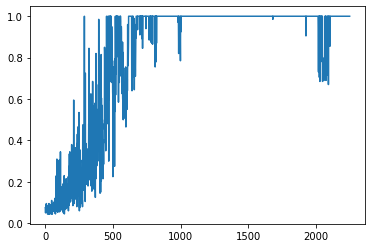

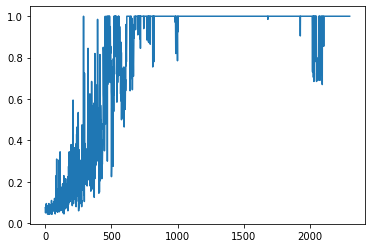

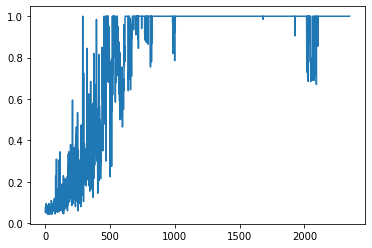

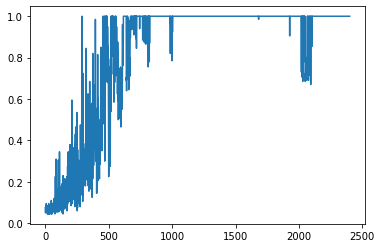

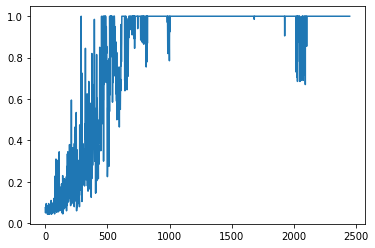

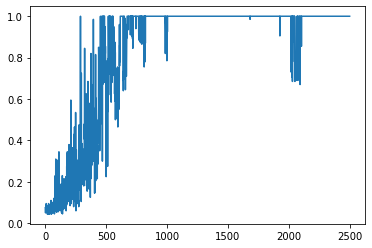

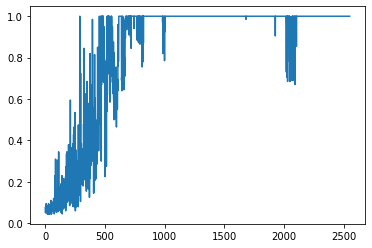

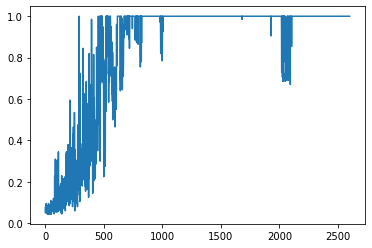

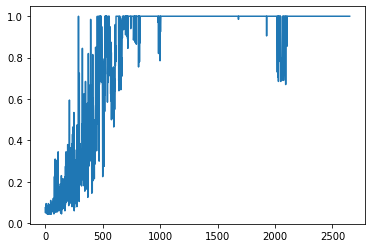

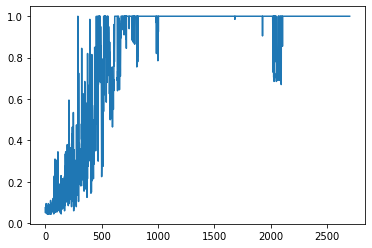

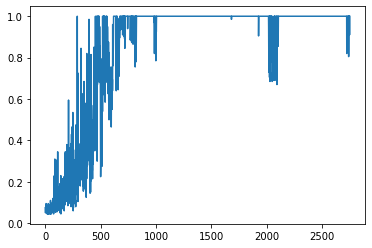

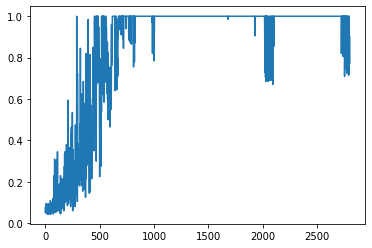

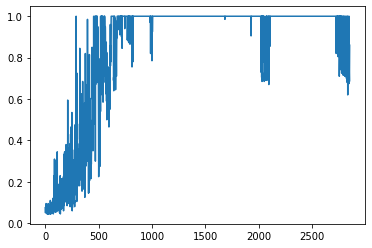

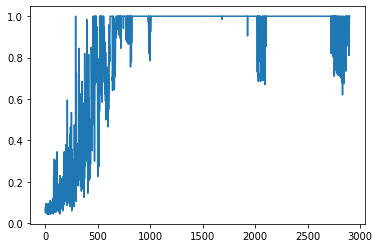

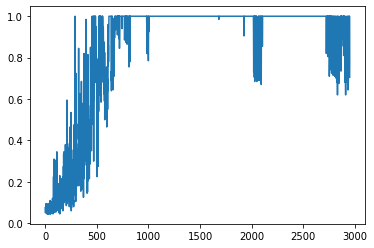

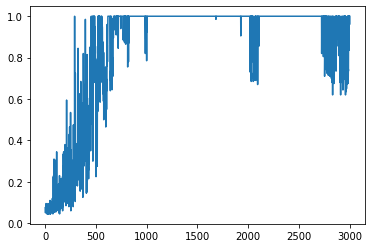

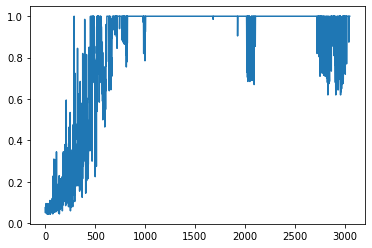

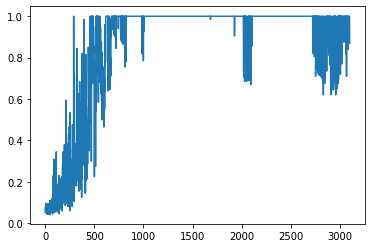

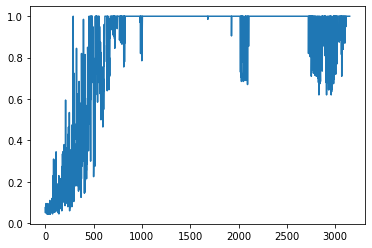

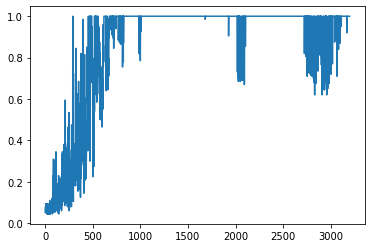

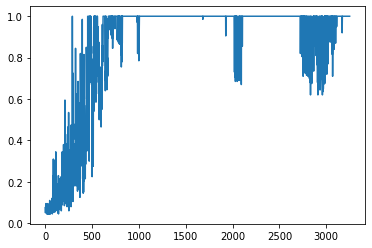

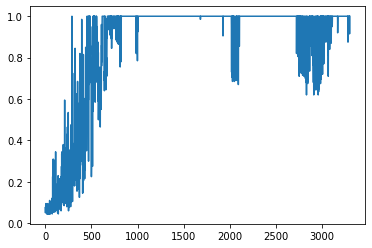

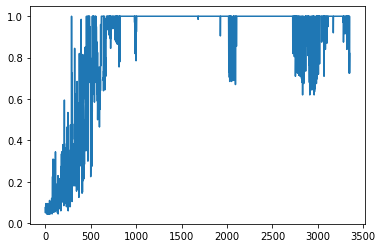

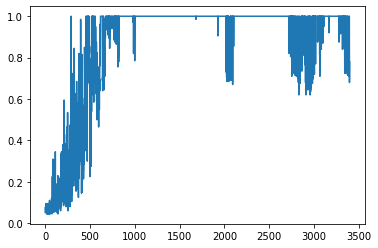

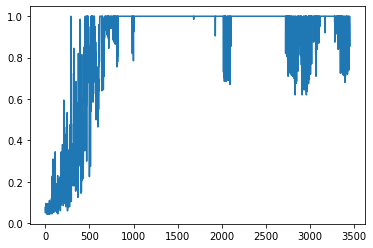

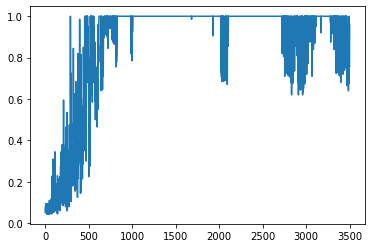

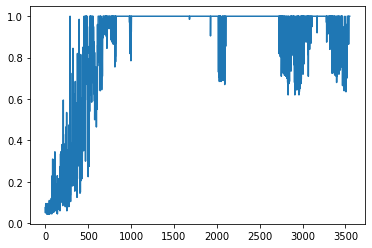

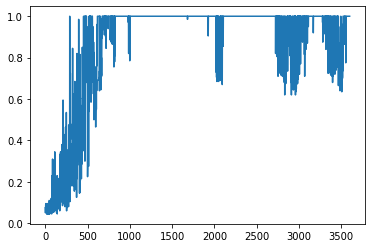

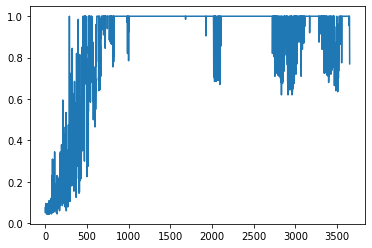

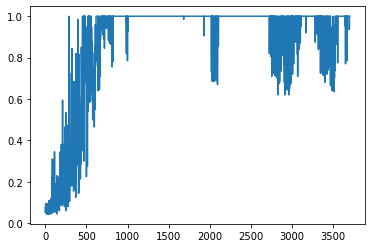

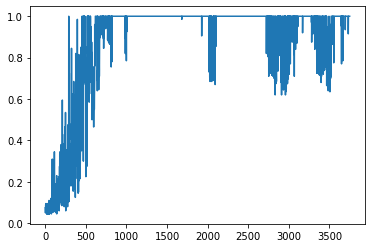

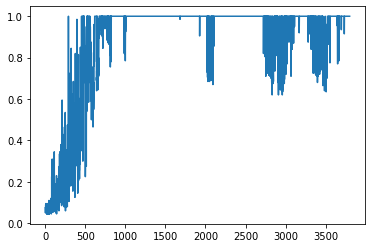

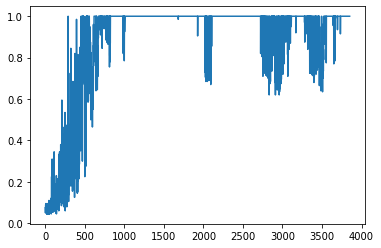

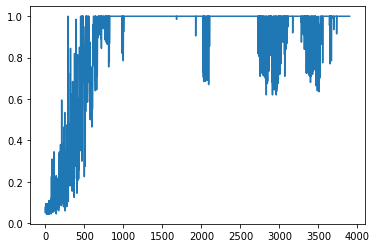

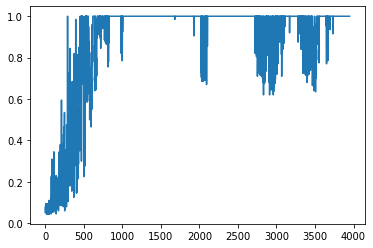

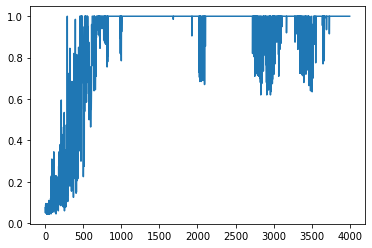

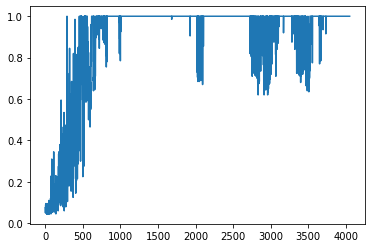

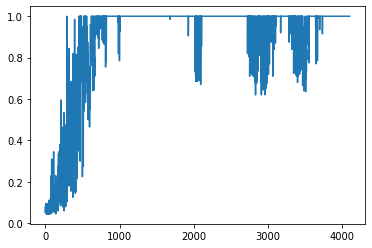

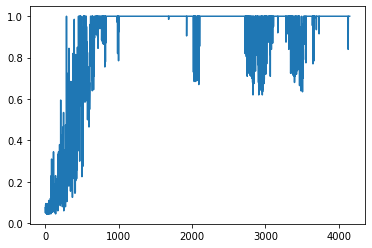

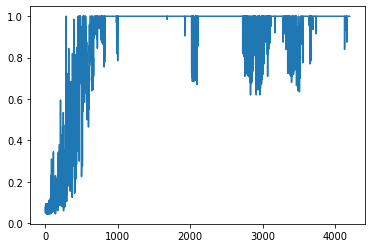

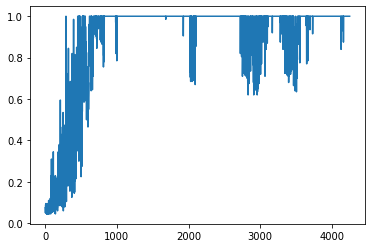

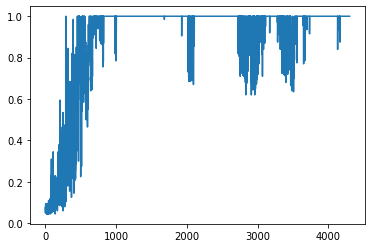

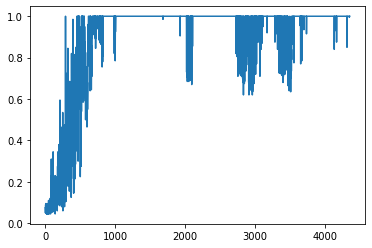

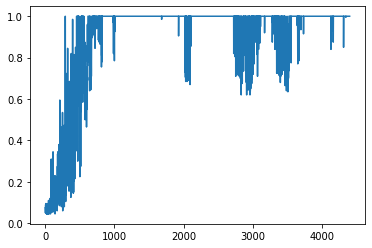

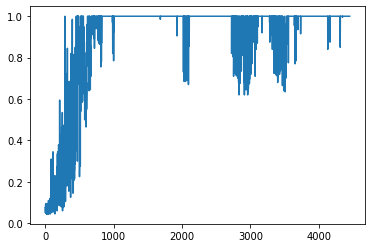

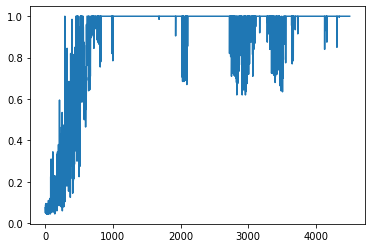

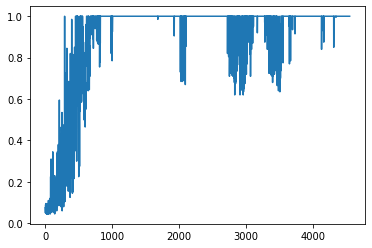

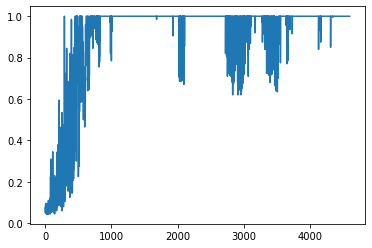

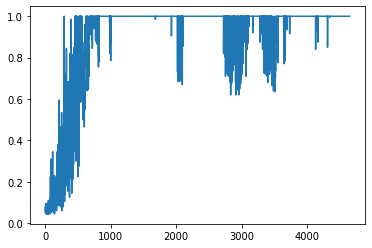

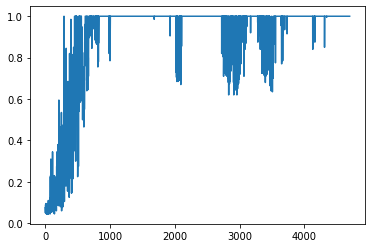

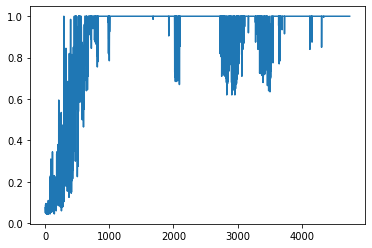

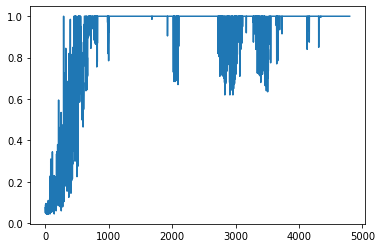

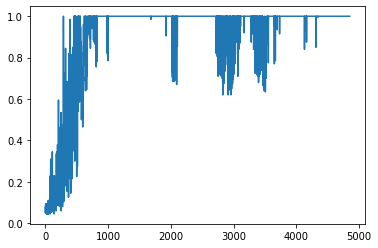

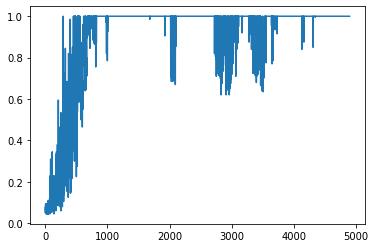

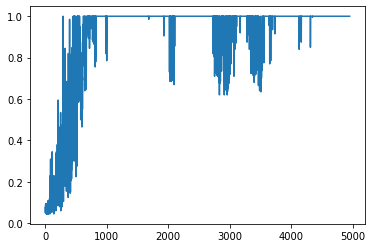

In [44]:
from lxmls.reinforcement_learning.actor_critic import train
train()